In [159]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.transforms import ScaledTranslation
from scipy import stats

In [160]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, 0)

In [161]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L1_20230918T232331.ict')
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY22_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
5981,2022-06-02 12:58:55,2022-06-02 12:58:56,32.901061,-69.417865,115.705,1.270,1.10,0.0
5982,2022-06-02 12:58:56,2022-06-02 12:58:57,32.901505,-69.416658,115.605,1.275,1.11,0.0
5983,2022-06-02 12:58:57,2022-06-02 12:58:58,32.901950,-69.415451,114.775,1.275,1.11,0.0
5984,2022-06-02 12:58:58,2022-06-02 12:58:59,32.902395,-69.414241,113.025,1.275,1.12,0.0
5985,2022-06-02 12:58:59,2022-06-02 12:59:00,32.902841,-69.413027,110.485,1.285,1.14,0.0
...,...,...,...,...,...,...,...,...
6641,2022-06-02 13:09:55,2022-06-02 13:09:56,32.856578,-69.176604,3810.860,0.000,0.00,0.0
6642,2022-06-02 13:09:56,2022-06-02 13:09:57,32.856534,-69.174895,3811.410,0.000,0.00,0.0
6643,2022-06-02 13:09:57,2022-06-02 13:09:58,32.856492,-69.173186,3812.340,0.000,0.00,0.0
6644,2022-06-02 13:09:58,2022-06-02 13:09:59,32.856451,-69.171477,3813.680,0.000,0.00,0.0


In [162]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L1_20230918T232331.ict')
start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))

DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]
DAY2_subset



,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
8926,2022-06-02 13:48:00,2022-06-02 13:48:01,32.397719,-65.920473,1896.68,0.415,0.745,0.0
8927,2022-06-02 13:48:01,2022-06-02 13:48:02,32.397400,-65.918900,1897.28,0.395,0.910,0.0
8928,2022-06-02 13:48:02,2022-06-02 13:48:03,32.397079,-65.917327,1898.01,0.425,1.020,0.0
8929,2022-06-02 13:48:03,2022-06-02 13:48:04,32.396758,-65.915754,1898.83,0.450,1.045,0.0
8930,2022-06-02 13:48:04,2022-06-02 13:48:05,32.396435,-65.914182,1899.75,0.440,0.985,0.0
...,...,...,...,...,...,...,...,...
10301,2022-06-02 14:10:55,2022-06-02 14:10:56,32.264343,-65.038703,3176.07,0.000,0.000,0.0
10302,2022-06-02 14:10:56,2022-06-02 14:10:57,32.263327,-65.039317,3180.14,0.000,0.000,0.0
10303,2022-06-02 14:10:57,2022-06-02 14:10:58,32.262289,-65.039886,3184.23,0.000,0.000,0.0
10304,2022-06-02 14:10:58,2022-06-02 14:10:59,32.261232,-65.040413,3188.41,0.000,0.000,0.0


In [163]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L2_20230918T232331.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset = DAY2b_subset.replace(-888888, 0)
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9180,2022-06-02 18:36:00,2022-06-02 18:36:01,32.312301,-65.009805,191.225,1.360,1.175,0.0
9181,2022-06-02 18:36:01,2022-06-02 18:36:02,32.312336,-65.010962,193.480,1.330,1.150,0.0
9182,2022-06-02 18:36:02,2022-06-02 18:36:03,32.312332,-65.012116,195.600,1.320,1.125,0.0
9183,2022-06-02 18:36:03,2022-06-02 18:36:04,32.312294,-65.013268,197.010,1.340,1.115,0.0
9184,2022-06-02 18:36:04,2022-06-02 18:36:05,32.312221,-65.014415,197.440,1.365,1.125,0.0
...,...,...,...,...,...,...,...,...
10195,2022-06-02 18:52:55,2022-06-02 18:52:56,32.205808,-64.977280,3678.610,0.000,0.000,0.0
10196,2022-06-02 18:52:56,2022-06-02 18:52:57,32.205215,-64.976028,3684.900,0.000,0.000,0.0
10197,2022-06-02 18:52:57,2022-06-02 18:52:58,32.204648,-64.974760,3691.340,0.000,0.000,0.0
10198,2022-06-02 18:52:58,2022-06-02 18:52:59,32.204104,-64.973478,3697.790,0.000,0.000,0.0


In [164]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220607_R0_L1_20230918T232332.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,0.615,0.525,0.0
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,0.620,0.530,0.0
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,0.625,0.540,0.0
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,0.635,0.560,0.0
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,0.640,0.570,0.0
...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,0.000,0.000,0.0
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,0.000,0.000,0.0
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,0.000,1.650,0.0
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,0.000,1.650,0.0


In [165]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220607_R0_L2_20230918T232332.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset =DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10420,2022-06-07 19:08:00,2022-06-07 19:08:01,32.242823,-65.003952,133.320,0.0,0.0,0.0
10421,2022-06-07 19:08:01,2022-06-07 19:08:02,32.243085,-65.002775,133.120,0.0,0.0,0.0
10422,2022-06-07 19:08:02,2022-06-07 19:08:03,32.243347,-65.001596,132.930,0.0,0.0,0.0
10423,2022-06-07 19:08:03,2022-06-07 19:08:04,32.243610,-65.000416,132.720,0.0,0.0,0.0
10424,2022-06-07 19:08:04,2022-06-07 19:08:05,32.243873,-64.999235,132.595,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11315,2022-06-07 19:22:55,2022-06-07 19:22:56,32.296480,-65.011792,3518.030,0.0,0.0,0.0
11316,2022-06-07 19:22:56,2022-06-07 19:22:57,32.296519,-65.013093,3524.890,0.0,0.0,0.0
11317,2022-06-07 19:22:57,2022-06-07 19:22:58,32.296518,-65.014396,3531.840,0.0,0.0,0.0
11318,2022-06-07 19:22:58,2022-06-07 19:22:59,32.296479,-65.015699,3538.850,0.0,0.0,0.0


In [166]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220608_R0_L2_20230918T232333.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10668,2022-06-08 20:30:00,2022-06-08 20:30:01,32.267080,-64.998961,152.725,0.695,0.500,0.00
10669,2022-06-08 20:30:01,2022-06-08 20:30:02,32.268158,-64.999178,153.350,0.715,0.530,0.00
10670,2022-06-08 20:30:02,2022-06-08 20:30:03,32.269234,-64.999434,153.870,0.730,0.540,0.00
10671,2022-06-08 20:30:03,2022-06-08 20:30:04,32.270310,-64.999724,154.255,0.740,0.540,0.00
10672,2022-06-08 20:30:04,2022-06-08 20:30:05,32.271382,-65.000051,154.510,0.725,0.525,0.00
...,...,...,...,...,...,...,...,...
11563,2022-06-08 20:44:55,2022-06-08 20:44:56,32.251172,-65.086081,3838.620,0.000,0.000,1.42
11564,2022-06-08 20:44:56,2022-06-08 20:44:57,32.250122,-65.085465,3847.170,0.000,0.000,1.23
11565,2022-06-08 20:44:57,2022-06-08 20:44:58,32.249088,-65.084808,3855.660,0.000,0.000,1.15
11566,2022-06-08 20:44:58,2022-06-08 20:44:59,32.248074,-65.084107,3864.100,0.000,0.000,1.24


In [167]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L1_20230918T232333.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10616,2022-06-10 15:17:00,2022-06-10 15:17:01,32.206691,-64.996969,122.040,0,0,0
10617,2022-06-10 15:17:01,2022-06-10 15:17:02,32.207809,-64.997169,122.105,0,0,0
10618,2022-06-10 15:17:02,2022-06-10 15:17:03,32.208928,-64.997370,122.170,0,0,0
10619,2022-06-10 15:17:03,2022-06-10 15:17:04,32.210048,-64.997569,122.240,0,0,0
10620,2022-06-10 15:17:04,2022-06-10 15:17:05,32.211167,-64.997768,122.315,0,0,0
...,...,...,...,...,...,...,...,...
11091,2022-06-10 15:24:55,2022-06-10 15:24:56,32.207088,-65.031191,3540.260,0,0,0
11092,2022-06-10 15:24:56,2022-06-10 15:24:57,32.207061,-65.029663,3546.970,0,0,0
11093,2022-06-10 15:24:57,2022-06-10 15:24:58,32.207068,-65.028134,3553.620,0,0,0
11094,2022-06-10 15:24:58,2022-06-10 15:24:59,32.207109,-65.026603,3560.200,0,0,0


In [168]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY110b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
7182,2022-06-10 19:30:00,2022-06-10 19:30:01,31.639092,-65.606420,113.375,0.630,0.390,0.000
7183,2022-06-10 19:30:01,2022-06-10 19:30:02,31.639446,-65.607515,113.225,0.625,0.370,0.000
7184,2022-06-10 19:30:02,2022-06-10 19:30:03,31.639806,-65.608607,113.065,0.620,0.355,0.000
7185,2022-06-10 19:30:03,2022-06-10 19:30:04,31.640170,-65.609698,112.970,0.615,0.345,0.000
7186,2022-06-10 19:30:04,2022-06-10 19:30:05,31.640539,-65.610788,112.985,0.615,0.340,0.000
...,...,...,...,...,...,...,...,...
8437,2022-06-10 19:50:55,2022-06-10 19:50:56,31.228702,-65.973911,4967.450,0.000,0.515,1.120
8438,2022-06-10 19:50:56,2022-06-10 19:50:57,31.227365,-65.974288,4964.110,0.000,0.705,1.070
8439,2022-06-10 19:50:57,2022-06-10 19:50:58,31.226025,-65.974659,4960.810,0.000,0.885,1.155
8440,2022-06-10 19:50:58,2022-06-10 19:50:59,31.224682,-65.975025,4957.520,0.000,1.085,1.230


In [169]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10482,2022-06-10 20:25:00,2022-06-10 20:25:01,31.199210,-65.892109,133.810,0.215,0.2,0.0
10483,2022-06-10 20:25:01,2022-06-10 20:25:02,31.200274,-65.891772,133.615,0.225,0.2,0.0
10484,2022-06-10 20:25:02,2022-06-10 20:25:03,31.201338,-65.891430,133.015,0.235,0.2,0.0
10485,2022-06-10 20:25:03,2022-06-10 20:25:04,31.202402,-65.891083,131.855,0.250,0.2,0.0
10486,2022-06-10 20:25:04,2022-06-10 20:25:05,31.203466,-65.890727,130.265,0.265,0.2,0.0
...,...,...,...,...,...,...,...,...
11077,2022-06-10 20:34:55,2022-06-10 20:34:56,31.464508,-65.626679,4924.170,0.000,0.0,0.0
11078,2022-06-10 20:34:56,2022-06-10 20:34:57,31.465555,-65.625580,4924.550,0.000,0.0,0.0
11079,2022-06-10 20:34:57,2022-06-10 20:34:58,31.466603,-65.624479,4924.900,0.000,0.0,0.0
11080,2022-06-10 20:34:58,2022-06-10 20:34:59,31.467650,-65.623378,4925.210,0.000,0.0,0.0


In [170]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L1_20230918T232334.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10800,2022-06-11 15:24:00,2022-06-11 15:24:01,32.234864,-64.977277,137.985,0.640,0.375,0.000
10801,2022-06-11 15:24:01,2022-06-11 15:24:02,32.233969,-64.976649,138.245,0.630,0.365,0.000
10802,2022-06-11 15:24:02,2022-06-11 15:24:03,32.233058,-64.976063,138.485,0.630,0.365,0.000
10803,2022-06-11 15:24:03,2022-06-11 15:24:04,32.232130,-64.975521,138.740,0.630,0.375,0.000
10804,2022-06-11 15:24:04,2022-06-11 15:24:05,32.231186,-64.975026,139.035,0.625,0.375,0.000
...,...,...,...,...,...,...,...,...
11875,2022-06-11 15:41:55,2022-06-11 15:41:56,32.259305,-64.971567,4701.700,0.000,0.000,0.885
11876,2022-06-11 15:41:56,2022-06-11 15:41:57,32.258543,-64.970428,4708.440,0.000,0.000,0.920
11877,2022-06-11 15:41:57,2022-06-11 15:41:58,32.257745,-64.969326,4714.800,0.000,0.000,1.040
11878,2022-06-11 15:41:58,2022-06-11 15:41:59,32.256913,-64.968261,4720.960,0.000,0.000,1.120


In [171]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L2_20230918T232334.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9830,2022-06-11 20:08:00,2022-06-11 20:08:01,31.216085,-64.640552,127.335,0.390,0.065,0.0
9831,2022-06-11 20:08:01,2022-06-11 20:08:02,31.216703,-64.641627,125.935,0.355,0.050,0.0
9832,2022-06-11 20:08:02,2022-06-11 20:08:03,31.217282,-64.642730,124.040,0.330,0.030,0.0
9833,2022-06-11 20:08:03,2022-06-11 20:08:04,31.217824,-64.643860,121.770,0.325,0.030,0.0
9834,2022-06-11 20:08:04,2022-06-11 20:08:05,31.218325,-64.645014,119.225,0.335,0.040,0.0
...,...,...,...,...,...,...,...,...
10284,2022-06-11 20:15:34,2022-06-11 20:15:35,31.204221,-64.650827,2831.710,0.200,0.595,0.0
10285,2022-06-11 20:15:35,2022-06-11 20:15:36,31.203070,-64.651345,2823.550,0.115,0.665,0.0
10286,2022-06-11 20:15:36,2022-06-11 20:15:37,31.201921,-64.651869,2815.510,0.030,0.695,0.0
10287,2022-06-11 20:15:37,2022-06-11 20:15:38,31.200775,-64.652397,2808.060,0.030,0.755,0.0


In [172]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220613_R0_L1_20230918T232335.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10015,2022-06-13 14:30:00,2022-06-13 14:30:01,32.210354,-65.054053,141.795,0.850,0.920,0.000
10016,2022-06-13 14:30:01,2022-06-13 14:30:02,32.209934,-65.052981,141.725,0.865,0.885,0.000
10017,2022-06-13 14:30:02,2022-06-13 14:30:03,32.209541,-65.051894,141.615,0.880,0.840,0.000
10018,2022-06-13 14:30:03,2022-06-13 14:30:04,32.209173,-65.050793,141.460,0.885,0.790,0.000
10019,2022-06-13 14:30:04,2022-06-13 14:30:05,32.208832,-65.049680,141.275,0.890,0.765,0.000
...,...,...,...,...,...,...,...,...
10970,2022-06-13 14:45:55,2022-06-13 14:45:56,32.197220,-65.046274,4504.770,0.000,0.000,1.285
10971,2022-06-13 14:45:56,2022-06-13 14:45:57,32.196954,-65.044914,4514.670,0.000,0.000,1.400
10972,2022-06-13 14:45:57,2022-06-13 14:45:58,32.196726,-65.043543,4523.980,0.000,0.000,1.440
10973,2022-06-13 14:45:58,2022-06-13 14:45:59,32.196539,-65.042160,4532.940,0.000,0.000,1.410


In [173]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220613_R0_L2_20230918T232335.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00")) 
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10610,2022-06-13 19:46:00,2022-06-13 19:46:01,32.251226,-65.007304,106.13,0.605,0.895,0.000
10611,2022-06-13 19:46:01,2022-06-13 19:46:02,32.250414,-65.006555,105.59,0.560,0.855,0.000
10612,2022-06-13 19:46:02,2022-06-13 19:46:03,32.249605,-65.005808,106.45,0.500,0.815,0.000
10613,2022-06-13 19:46:03,2022-06-13 19:46:04,32.248799,-65.005062,108.91,0.480,0.795,0.000
10614,2022-06-13 19:46:04,2022-06-13 19:46:05,32.247996,-65.004323,112.60,0.415,0.790,0.000
...,...,...,...,...,...,...,...,...
11985,2022-06-13 20:08:55,2022-06-13 20:08:56,32.290180,-64.996666,4558.09,0.000,0.000,1.325
11986,2022-06-13 20:08:56,2022-06-13 20:08:57,32.289203,-64.997413,4565.53,0.000,0.000,1.235
11987,2022-06-13 20:08:57,2022-06-13 20:08:58,32.288204,-64.998124,4572.98,0.000,0.000,1.180
11988,2022-06-13 20:08:58,2022-06-13 20:08:59,32.287185,-64.998799,4580.36,0.000,0.000,1.190


In [174]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220614_R0_20230918T232335.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9363,2022-06-14 16:05:00,2022-06-14 16:05:01,30.642555,-64.394685,117.000,0.400,0.090,0.000
9364,2022-06-14 16:05:01,2022-06-14 16:05:02,30.641725,-64.395343,117.085,0.380,0.090,0.000
9365,2022-06-14 16:05:02,2022-06-14 16:05:03,30.640923,-64.396042,117.190,0.375,0.090,0.000
9366,2022-06-14 16:05:03,2022-06-14 16:05:04,30.640148,-64.396780,117.295,0.355,0.090,0.000
9367,2022-06-14 16:05:04,2022-06-14 16:05:05,30.639403,-64.397555,117.380,0.325,0.105,0.000
...,...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.590,0.115,-0.390,0.995
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.000,0.140,-0.485,1.365
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.420,0.140,-0.605,1.735
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.860,0.140,-0.705,1.850


In [175]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220617_R0_20230918T232335.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00")) 
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10469,2022-06-17 16:20:00,2022-06-17 16:20:01,32.206574,-65.006772,134.100,-0.230,-0.270,0.000
10470,2022-06-17 16:20:01,2022-06-17 16:20:02,32.206131,-65.005761,133.795,-0.225,-0.260,0.000
10471,2022-06-17 16:20:02,2022-06-17 16:20:03,32.205725,-65.004728,133.485,-0.210,-0.235,0.000
10472,2022-06-17 16:20:03,2022-06-17 16:20:04,32.205357,-65.003676,133.170,-0.180,-0.195,0.000
10473,2022-06-17 16:20:04,2022-06-17 16:20:05,32.205027,-65.002606,132.825,-0.170,-0.185,0.000
...,...,...,...,...,...,...,...,...
12084,2022-06-17 16:46:55,2022-06-17 16:46:56,32.158601,-65.020304,7639.050,0.000,0.000,1.315
12085,2022-06-17 16:46:56,2022-06-17 16:46:57,32.157293,-65.019563,7645.810,0.000,0.000,1.370
12086,2022-06-17 16:46:57,2022-06-17 16:46:58,32.156002,-65.018778,7652.610,0.000,0.000,1.435
12087,2022-06-17 16:46:58,2022-06-17 16:46:59,32.154729,-65.017953,7659.440,0.000,0.000,1.420


In [176]:
nbins = 100
bins_1000 = np.linspace(DAY22_subset.GPS_Altitude_THORNHILL.min(), DAY22_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY22_subset['Bins'] = pd.cut(DAY22_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY22_subset_1000 = DAY22_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000a = DAY22_subset_1000[start_index:stop_index]
DAY1000_subset_1000a

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(105.985, 143.17]",2022-06-02 12:59:00.500,2022-06-02 12:59:01.500,32.903514,-69.411194,113.9000,1.3050,1.1575,0.0
"(143.17, 180.354]",2022-06-02 12:59:09.500,2022-06-02 12:59:10.500,32.907635,-69.400132,160.4275,1.3900,1.2575,0.0
"(180.354, 217.539]",2022-06-02 12:59:14.500,2022-06-02 12:59:15.500,32.910235,-69.394203,199.8250,1.3775,1.2975,0.0
"(217.539, 254.723]",2022-06-02 12:59:20.500,2022-06-02 12:59:21.500,32.914346,-69.387850,234.4575,1.3800,1.1950,0.0
"(254.723, 291.908]",2022-06-02 12:59:26.000,2022-06-02 12:59:27.000,32.919085,-69.383209,276.6850,1.3750,1.1900,0.0
"(291.908, 329.092]",2022-06-02 12:59:32.000,2022-06-02 12:59:33.000,32.925125,-69.379793,304.7050,1.3800,1.1900,0.0
"(329.092, 366.277]",2022-06-02 12:59:37.000,2022-06-02 12:59:38.000,32.930599,-69.378595,345.2250,1.3800,1.1800,0.0
"(366.277, 403.461]",2022-06-02 12:59:40.500,2022-06-02 12:59:41.500,32.934451,-69.378665,383.8625,1.3375,1.1275,0.0
"(403.461, 440.646]",2022-06-02 12:59:45.500,2022-06-02 12:59:46.500,32.939847,-69.379819,420.9575,1.3800,1.1750,0.0


In [177]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000a = DAY22_subset_1000[start_index:stop_index]
DAY3000_subset_3000a

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(998.414, 1035.599]",2022-06-02 13:00:58.500,2022-06-02 13:00:59.500,32.926077,-69.440875,1020.465,1.1100,0.840,0.0
"(1035.599, 1072.783]",2022-06-02 13:01:03.000,2022-06-02 13:01:04.000,32.921032,-69.439333,1057.400,1.0300,0.860,0.0
"(1072.783, 1109.968]",2022-06-02 13:01:08.000,2022-06-02 13:01:09.000,32.915694,-69.436460,1089.620,0.9550,0.910,0.0
"(1109.968, 1147.152]",2022-06-02 13:01:13.000,2022-06-02 13:01:14.000,32.910879,-69.432361,1128.500,0.8900,0.830,0.0
"(1147.152, 1184.337]",2022-06-02 13:01:17.500,2022-06-02 13:01:18.500,32.907172,-69.427752,1167.055,0.8025,0.765,0.0
...,...,...,...,...,...,...,...,...
"(3266.672, 3303.856]",2022-06-02 13:06:03.500,2022-06-02 13:06:04.500,32.971773,-69.393744,3284.205,0.0000,1.905,0.0
"(3303.856, 3341.041]",2022-06-02 13:06:09.000,2022-06-02 13:06:10.000,32.970076,-69.401513,3322.510,0.0000,2.730,0.0
"(3341.041, 3378.225]",2022-06-02 13:06:13.500,2022-06-02 13:06:14.500,32.967769,-69.407456,3359.940,0.0000,2.145,0.0


In [178]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2_subset.GPS_Altitude_THORNHILL.min(), DAY2_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2_subset['Bins'] = pd.cut(DAY2_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2_subset_1000 = DAY2_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000 = DAY2_subset_1000[start_index:stop_index]
DAY1000_subset_1000


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(106.28, 137.146]",2022-06-02 13:58:08.000,2022-06-02 13:58:09.000,32.208306,-65.047757,123.1500,1.4250,1.3000,0.0
"(137.146, 168.011]",2022-06-02 13:58:50.000,2022-06-02 13:58:51.000,32.204224,-64.996812,150.3850,1.3500,1.1950,0.0
"(168.011, 198.876]",2022-06-02 13:59:04.000,2022-06-02 13:59:05.000,32.212466,-64.981598,178.9650,1.3850,1.0850,0.0
"(198.876, 229.742]",2022-06-02 13:57:05.500,2022-06-02 13:57:06.500,32.234272,-65.119394,216.3950,1.4250,1.1600,0.0
"(229.742, 260.607]",2022-06-02 13:56:58.500,2022-06-02 13:56:59.500,32.237123,-65.127642,247.8450,1.4025,1.1600,0.0
"(260.607, 291.473]",2022-06-02 13:59:25.500,2022-06-02 13:59:26.500,32.233410,-64.973290,277.8950,1.5700,1.1450,0.0
"(291.473, 322.338]",2022-06-02 13:56:44.500,2022-06-02 13:56:45.500,32.242777,-65.144480,306.7500,1.3900,1.1150,0.0
"(322.338, 353.204]",2022-06-02 13:56:34.500,2022-06-02 13:56:35.500,32.246491,-65.156887,336.3375,1.3900,0.9725,0.0
"(353.204, 384.069]",2022-06-02 13:59:47.000,2022-06-02 13:59:48.000,32.249040,-64.980342,369.0100,1.4450,1.0900,0.0


In [179]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000 = DAY2_subset_1000[start_index:stop_index]
DAY3000_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1001.379, 1032.245]",2022-06-02 14:02:21.500,2022-06-02 14:02:22.500,32.233572,-64.967034,1016.815,1.545,1.395,0.0
"(1032.245, 1063.11]",2022-06-02 14:02:28.000,2022-06-02 14:02:29.000,32.238559,-64.960542,1051.000,1.520,1.390,0.0
"(1063.11, 1093.976]",2022-06-02 14:02:35.000,2022-06-02 14:02:36.000,32.244854,-64.954807,1077.130,1.465,1.190,0.0
"(1093.976, 1124.842]",2022-06-02 14:02:41.000,2022-06-02 14:02:42.000,32.250788,-64.951200,1108.710,1.280,1.185,0.0
"(1124.842, 1155.707]",2022-06-02 14:02:47.500,2022-06-02 14:02:48.500,32.257540,-64.948780,1139.915,1.245,1.390,0.0
...,...,...,...,...,...,...,...,...
"(3007.637, 3038.502]",2022-06-02 14:10:25.500,2022-06-02 14:10:26.500,32.281787,-65.007364,3024.730,0.000,2.445,0.0
"(3038.502, 3069.368]",2022-06-02 14:10:32.000,2022-06-02 14:10:33.000,32.280306,-65.015731,3053.620,0.000,2.830,0.0
"(3069.368, 3100.234]",2022-06-02 14:10:36.500,2022-06-02 14:10:37.500,32.278437,-65.021220,3084.940,0.000,0.000,0.0


In [180]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2b_subset.GPS_Altitude_THORNHILL.min(), DAY2b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2b_subset['Bins'] = pd.cut(DAY2b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2b_subset_1000 = DAY2b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000b = DAY2b_subset_1000[start_index:stop_index]
DAY1000_subset_1000b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(132.5, 168.217]",2022-06-02 18:36:33.500,2022-06-02 18:36:34.500,32.294860,-65.039923,151.3675,1.3400,1.1600,0.0
"(168.217, 203.933]",2022-06-02 18:36:12.000,2022-06-02 18:36:13.000,32.310300,-65.023333,186.7200,1.3350,1.1250,0.0
"(203.933, 239.65]",2022-06-02 18:37:02.000,2022-06-02 18:37:03.000,32.265793,-65.038849,214.3750,1.3850,1.2150,0.0
"(239.65, 275.366]",2022-06-02 18:37:13.000,2022-06-02 18:37:14.000,32.254715,-65.034943,260.1500,1.4000,1.2000,0.0
"(275.366, 311.083]",2022-06-02 18:37:24.000,2022-06-02 18:37:25.000,32.245041,-65.027102,289.4500,1.3400,1.2900,0.0
"(311.083, 346.8]",2022-06-02 18:37:38.000,2022-06-02 18:37:39.000,32.237004,-65.011946,332.1600,1.1850,1.3650,0.0
"(346.8, 382.516]",2022-06-02 18:37:53.000,2022-06-02 18:37:54.000,32.236630,-64.992675,362.9050,1.1600,1.3850,0.0
"(382.516, 418.233]",2022-06-02 18:38:07.000,2022-06-02 18:38:08.000,32.244388,-64.977146,399.5450,1.0900,1.1300,0.0
"(418.233, 453.949]",2022-06-02 18:38:19.000,2022-06-02 18:38:20.000,32.255430,-64.969121,432.9000,1.1450,1.3150,0.0


In [181]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000b = DAY2b_subset_1000[start_index:stop_index]
DAY3000_subset_3000b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(989.698, 1025.415]",2022-06-02 18:41:23.000,2022-06-02 18:41:24.000,32.269872,-64.947192,1010.300,0.9700,1.125,0.0
"(1025.415, 1061.132]",2022-06-02 18:41:31.500,2022-06-02 18:41:32.500,32.278880,-64.945719,1046.060,0.8925,1.300,0.0
"(1061.132, 1096.848]",2022-06-02 18:41:40.500,2022-06-02 18:41:41.500,32.288332,-64.947078,1080.155,0.9075,1.410,0.0
"(1096.848, 1132.565]",2022-06-02 18:41:52.500,2022-06-02 18:41:53.500,32.299232,-64.954250,1111.995,0.9900,1.665,0.0
"(1132.565, 1168.281]",2022-06-02 18:42:04.500,2022-06-02 18:42:05.500,32.306221,-64.966341,1150.090,0.8000,1.490,0.0
...,...,...,...,...,...,...,...,...
"(3275.561, 3311.277]",2022-06-02 18:51:48.500,2022-06-02 18:51:49.500,32.275042,-65.008039,3293.650,0.0000,0.000,0.0
"(3311.277, 3346.994]",2022-06-02 18:51:54.000,2022-06-02 18:51:55.000,32.268640,-65.008712,3329.670,0.0000,0.000,0.0
"(3346.994, 3382.711]",2022-06-02 18:51:59.000,2022-06-02 18:52:00.000,32.262831,-65.009201,3366.390,0.0000,0.000,0.0


In [182]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7_subset.GPS_Altitude_THORNHILL.min(), DAY7_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7_subset['Bins'] = pd.cut(DAY7_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7_subset_1000 = DAY7_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7 = DAY7_subset_1000[start_index:stop_index]
DAY1000_subset_7


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(125.87, 152.826]",2022-06-07 14:32:05.500,2022-06-07 14:32:06.500,32.247084,-64.993783,130.6300,0.6600,0.5900,0.0
"(152.826, 179.781]",2022-06-07 14:32:14.000,2022-06-07 14:32:15.000,32.241242,-64.985855,172.0250,0.7450,0.6900,0.0
"(179.781, 206.737]",2022-06-07 14:32:27.500,2022-06-07 14:32:28.500,32.229405,-64.976252,188.3900,0.8075,0.8025,0.0
"(206.737, 233.692]",2022-06-07 14:32:40.000,2022-06-07 14:32:41.000,32.216014,-64.972467,219.6400,0.7300,0.7650,0.0
"(233.692, 260.648]",2022-06-07 14:32:48.000,2022-06-07 14:32:49.000,32.207231,-64.973025,250.9800,0.7100,0.7450,0.0
"(260.648, 287.604]",2022-06-07 14:33:01.000,2022-06-07 14:33:02.000,32.193921,-64.978990,261.7850,0.7200,0.6800,0.0
"(287.604, 314.559]",2022-06-07 14:33:13.500,2022-06-07 14:33:14.500,32.184462,-64.990490,305.6750,0.8000,0.7000,0.0
"(314.559, 341.515]",2022-06-07 14:33:26.000,2022-06-07 14:33:27.000,32.179369,-65.005060,326.2850,0.8350,0.7000,0.0
"(341.515, 368.47]",2022-06-07 14:33:38.000,2022-06-07 14:33:39.000,32.179429,-65.019922,353.5650,0.8350,0.6900,0.0


In [183]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7_subset_3000 = DAY7_subset_1000[start_index:stop_index]
DAY7_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1015.405, 1042.36]",2022-06-07 14:38:12.000,2022-06-07 14:38:13.000,32.229355,-65.062216,1030.120,0.9350,0.975,0.0
"(1042.36, 1069.316]",2022-06-07 14:38:21.000,2022-06-07 14:38:22.000,32.237006,-65.057784,1055.940,0.8750,0.880,0.0
"(1069.316, 1096.272]",2022-06-07 14:38:32.000,2022-06-07 14:38:33.000,32.245194,-65.050061,1084.140,0.8450,0.815,0.0
"(1096.272, 1123.227]",2022-06-07 14:38:42.500,2022-06-07 14:38:43.500,32.251219,-65.040481,1107.855,0.7975,0.825,0.0
"(1123.227, 1150.183]",2022-06-07 14:38:52.000,2022-06-07 14:38:53.000,32.254166,-65.030077,1136.620,0.8000,0.745,0.0
...,...,...,...,...,...,...,...,...
"(2659.696, 2686.652]",2022-06-07 14:46:31.000,2022-06-07 14:46:32.000,32.246810,-65.029401,2672.740,0.0000,0.000,0.0
"(2686.652, 2713.608]",2022-06-07 14:46:36.000,2022-06-07 14:46:37.000,32.249493,-65.023658,2699.640,0.0000,0.000,0.0
"(2713.608, 2740.563]",2022-06-07 14:46:41.000,2022-06-07 14:46:42.000,32.251676,-65.017607,2726.120,0.0000,0.000,0.0


In [184]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7b_subset.GPS_Altitude_THORNHILL.min(), DAY7b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7b_subset['Bins'] = pd.cut(DAY7b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7b_subset_1000 = DAY7b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7b = DAY7b_subset_1000[start_index:stop_index]
DAY1000_subset_7b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(132.595, 166.728]",2022-06-07 19:08:09.000,2022-06-07 19:08:10.000,32.245348,-64.993377,138.9650,0.0,0.0,0.0
"(166.728, 200.861]",2022-06-07 19:08:21.500,2022-06-07 19:08:22.500,32.252398,-64.980762,183.5400,0.0,0.0,0.0
"(200.861, 234.994]",2022-06-07 19:08:31.500,2022-06-07 19:08:32.500,32.261138,-64.974323,217.5125,0.0,0.0,0.0
"(234.994, 269.127]",2022-06-07 19:08:42.500,2022-06-07 19:08:43.500,32.272447,-64.972235,251.5325,0.0,0.0,0.0
"(269.127, 303.26]",2022-06-07 19:08:51.500,2022-06-07 19:08:52.500,32.281722,-64.974383,286.8050,0.0,0.0,0.0
"(303.26, 337.393]",2022-06-07 19:09:01.500,2022-06-07 19:09:02.500,32.290928,-64.980598,318.2300,0.0,0.0,0.0
"(337.393, 371.526]",2022-06-07 19:09:12.000,2022-06-07 19:09:13.000,32.298341,-64.990692,354.8600,0.0,0.0,0.0
"(371.526, 405.659]",2022-06-07 19:09:23.500,2022-06-07 19:09:24.500,32.302729,-65.004544,389.4000,0.0,0.0,0.0
"(405.659, 439.792]",2022-06-07 19:09:35.000,2022-06-07 19:09:36.000,32.302622,-65.019577,421.5550,0.0,0.0,0.0


In [185]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7b_subset_3000 = DAY7b_subset_1000[start_index:stop_index]
DAY7b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(985.921, 1020.054]",2022-06-07 19:12:28.500,2022-06-07 19:12:29.500,32.296267,-64.998305,1003.240,0.0,0.0,0.0
"(1020.054, 1054.187]",2022-06-07 19:12:38.500,2022-06-07 19:12:39.500,32.300110,-65.010330,1036.910,0.0,0.0,0.0
"(1054.187, 1088.32]",2022-06-07 19:12:48.000,2022-06-07 19:12:49.000,32.300666,-65.022512,1072.330,0.0,0.0,0.0
"(1088.32, 1122.453]",2022-06-07 19:12:58.500,2022-06-07 19:12:59.500,32.297754,-65.035518,1104.765,0.0,0.0,0.0
"(1122.453, 1156.586]",2022-06-07 19:13:10.500,2022-06-07 19:13:11.500,32.290292,-65.048118,1140.005,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
"(3306.969, 3341.102]",2022-06-07 19:22:24.000,2022-06-07 19:22:25.000,32.278740,-64.979743,3325.470,0.0,0.0,0.0
"(3341.102, 3375.235]",2022-06-07 19:22:29.500,2022-06-07 19:22:30.500,32.283576,-64.983815,3359.530,0.0,0.0,0.0
"(3375.235, 3409.368]",2022-06-07 19:22:35.000,2022-06-07 19:22:36.000,32.287903,-64.988645,3393.950,0.0,0.0,0.0


In [186]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY8_subset.GPS_Altitude_THORNHILL.min(), DAY8_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY8_subset['Bins'] = pd.cut(DAY8_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY8_subset_1000 = DAY8_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_8 = DAY8_subset_1000[start_index:stop_index]
DAY1000_subset_8


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(147.455, 184.705]",2022-06-08 20:30:28.000,2022-06-08 20:30:29.000,32.293626,-65.017848,154.5400,0.7150,0.5400,0.0
"(184.705, 221.955]",2022-06-08 20:31:07.000,2022-06-08 20:31:08.000,32.300051,-65.066294,198.9850,0.9100,0.8000,0.0
"(221.955, 259.205]",2022-06-08 20:31:21.500,2022-06-08 20:31:22.500,32.291698,-65.080461,242.1600,0.9275,0.7975,0.0
"(259.205, 296.455]",2022-06-08 20:31:32.500,2022-06-08 20:31:33.500,32.282742,-65.087275,278.0025,0.9375,0.7350,0.0
"(296.455, 333.705]",2022-06-08 20:31:44.000,2022-06-08 20:31:45.000,32.272093,-65.089858,314.4600,0.9950,0.7750,0.0
"(333.705, 370.955]",2022-06-08 20:31:54.500,2022-06-08 20:31:55.500,32.262326,-65.088323,352.5375,0.9525,0.8550,0.0
"(370.955, 408.205]",2022-06-08 20:32:04.500,2022-06-08 20:32:05.500,32.253920,-65.083280,389.1225,0.9500,0.8275,0.0
"(408.205, 445.455]",2022-06-08 20:32:15.500,2022-06-08 20:32:16.500,32.246596,-65.074434,425.9075,0.9350,0.8200,0.0
"(445.455, 482.705]",2022-06-08 20:32:27.000,2022-06-08 20:32:28.000,32.241922,-65.062468,462.3600,1.0000,0.7450,0.0


In [187]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY8_subset_3000 = DAY8_subset_1000[start_index:stop_index]
DAY8_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1004.206, 1041.456]",2022-06-08 20:35:22.000,2022-06-08 20:35:23.000,32.281187,-65.081965,1020.120,0.6750,0.5150,0.0000
"(1041.456, 1078.706]",2022-06-08 20:35:35.000,2022-06-08 20:35:36.000,32.268765,-65.078655,1060.190,1.0100,0.7050,0.0000
"(1078.706, 1115.956]",2022-06-08 20:35:48.500,2022-06-08 20:35:49.500,32.257159,-65.071069,1096.685,1.1700,0.7850,0.0000
"(1115.956, 1153.206]",2022-06-08 20:36:00.500,2022-06-08 20:36:01.500,32.249873,-65.060165,1134.755,1.2275,0.9800,0.0000
"(1153.206, 1190.456]",2022-06-08 20:36:12.500,2022-06-08 20:36:13.500,32.247776,-65.046364,1173.080,1.1175,1.3975,0.0000
...,...,...,...,...,...,...,...,...
"(3276.459, 3313.709]",2022-06-08 20:43:51.000,2022-06-08 20:43:52.000,32.296100,-65.043959,3293.800,0.0000,0.0000,0.0000
"(3313.709, 3350.959]",2022-06-08 20:43:55.500,2022-06-08 20:43:56.500,32.297077,-65.049657,3332.045,0.0000,0.0000,0.8400
"(3350.959, 3388.209]",2022-06-08 20:44:00.000,2022-06-08 20:44:01.000,32.297241,-65.055479,3370.540,0.0000,0.0000,1.0300


In [188]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10_subset.GPS_Altitude_THORNHILL.min(), DAY10_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10_subset['Bins'] = pd.cut(DAY10_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10_subset_1000 = DAY10_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10 = DAY10_subset_1000[start_index:stop_index]
DAY1000_subset_10

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(122.04, 156.487]",2022-06-10 15:17:25.000,2022-06-10 15:17:26.000,32.234690,-65.001976,123.7050,0.0,0.0,0.0
"(156.487, 190.934]",2022-06-10 15:17:52.500,2022-06-10 15:17:53.500,32.265725,-65.007644,173.7850,0.0,0.0,0.0
"(190.934, 225.381]",2022-06-10 15:17:58.000,2022-06-10 15:17:59.000,32.271651,-65.009660,209.2900,0.0,0.0,0.0
"(225.381, 259.828]",2022-06-10 15:18:03.000,2022-06-10 15:18:04.000,32.276788,-65.012279,244.1150,0.0,0.0,0.0
"(259.828, 294.274]",2022-06-10 15:18:07.500,2022-06-10 15:18:08.500,32.281187,-65.015215,277.9725,0.0,0.0,0.0
"(294.274, 328.721]",2022-06-10 15:18:12.000,2022-06-10 15:18:13.000,32.285285,-65.018704,312.6600,0.0,0.0,0.0
"(328.721, 363.168]",2022-06-10 15:18:16.500,2022-06-10 15:18:17.500,32.288983,-65.022752,349.4500,0.0,0.0,0.0
"(363.168, 397.615]",2022-06-10 15:18:20.500,2022-06-10 15:18:21.500,32.291912,-65.026738,383.6350,0.0,0.0,0.0
"(397.615, 432.062]",2022-06-10 15:18:24.500,2022-06-10 15:18:25.500,32.294488,-65.031034,417.9100,0.0,0.0,0.0


In [189]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10_subset_3000 = DAY10_subset_1000[start_index:stop_index]
DAY10_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(983.212, 1017.659]",2022-06-10 15:19:33.500,2022-06-10 15:19:34.500,32.275745,-65.106980,1002.010,0.0,0.0,0.0
"(1017.659, 1052.106]",2022-06-10 15:19:37.500,2022-06-10 15:19:38.500,32.271569,-65.108848,1036.915,0.0,0.0,0.0
"(1052.106, 1086.553]",2022-06-10 15:19:41.500,2022-06-10 15:19:42.500,32.267229,-65.110177,1072.325,0.0,0.0,0.0
"(1086.553, 1121.0]",2022-06-10 15:19:45.000,2022-06-10 15:19:46.000,32.263341,-65.110907,1103.920,0.0,0.0,0.0
"(1121.0, 1155.447]",2022-06-10 15:19:48.500,2022-06-10 15:19:49.500,32.259401,-65.111223,1135.630,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
"(3291.155, 3325.602]",2022-06-10 15:24:24.000,2022-06-10 15:24:25.000,32.223132,-65.072532,3308.150,0.0,0.0,0.0
"(3325.602, 3360.049]",2022-06-10 15:24:29.000,2022-06-10 15:24:30.000,32.218854,-65.067099,3344.300,0.0,0.0,0.0
"(3360.049, 3394.496]",2022-06-10 15:24:33.500,2022-06-10 15:24:34.500,32.215490,-65.061689,3377.515,0.0,0.0,0.0


In [190]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY110b_subset.GPS_Altitude_THORNHILL.min(), DAY110b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY110b_subset['Bins'] = pd.cut(DAY110b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY110b_subset_1000 = DAY110b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_110b = DAY110b_subset_1000[start_index:stop_index]
DAY1000_subset_110b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(112.97, 161.788]",2022-06-10 19:32:19.500,2022-06-10 19:32:20.500,31.700626,-65.755362,115.2325,0.6200,0.3700,0.0
"(161.788, 210.605]",2022-06-10 19:34:43.500,2022-06-10 19:34:44.500,31.798272,-65.891416,181.9325,0.5100,0.3200,0.0
"(210.605, 259.422]",2022-06-10 19:34:52.000,2022-06-10 19:34:53.000,31.805841,-65.897477,232.4700,0.4800,0.3200,0.0
"(259.422, 308.24]",2022-06-10 19:35:00.000,2022-06-10 19:35:01.000,31.813945,-65.901028,286.4950,0.4950,0.3250,0.0
"(308.24, 357.058]",2022-06-10 19:35:09.000,2022-06-10 19:35:10.000,31.823671,-65.902442,332.9850,0.4600,0.2500,0.0
"(357.058, 405.875]",2022-06-10 19:35:18.000,2022-06-10 19:35:19.000,31.833527,-65.901482,381.7600,0.4450,0.2450,0.0
"(405.875, 454.692]",2022-06-10 19:35:27.000,2022-06-10 19:35:28.000,31.842996,-65.897901,429.9200,0.4600,0.2250,0.0
"(454.692, 503.51]",2022-06-10 19:35:36.000,2022-06-10 19:35:37.000,31.851346,-65.891483,479.5150,0.4650,0.2450,0.0
"(503.51, 552.328]",2022-06-10 19:35:45.000,2022-06-10 19:35:46.000,31.857986,-65.882745,529.9600,0.4800,0.3200,0.0


In [191]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY110b_subset_3000 = DAY110b_subset_1000[start_index:stop_index]
DAY110b_subset_3000.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,50,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.0
mean,2022-06-10 19:40:40.389999616,2022-06-10 19:40:41.389999616,31.831694,-65.831992,2212.45680,0.752250,0.940300,0.0
min,2022-06-10 19:37:18.500000,2022-06-10 19:37:19.500000,31.758285,-65.878375,1016.09500,0.000000,0.000000,0.0
25%,2022-06-10 19:38:59.249999872,2022-06-10 19:39:00.249999872,31.811919,-65.857824,1614.56625,0.008750,0.439375,0.0
50%,2022-06-10 19:40:36.750000128,2022-06-10 19:40:37.750000128,31.834155,-65.830404,2214.46500,0.826250,0.935000,0.0
75%,2022-06-10 19:42:20.624999936,2022-06-10 19:42:21.624999936,31.859045,-65.805386,2809.13750,1.256875,1.408750,0.0
max,2022-06-10 19:43:52.500000,2022-06-10 19:43:53.500000,31.871745,-65.791199,3415.82500,1.620000,2.547500,0.0
std,NaN,NaN,0.030311,0.028828,711.99631,0.567165,0.717136,0.0


In [192]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10b_subset.GPS_Altitude_THORNHILL.min(), DAY10b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10b_subset['Bins'] = pd.cut(DAY10b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10b_subset_1000 = DAY10b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10b = DAY10b_subset_1000[start_index:stop_index]
DAY1000_subset_10b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(119.575, 167.73]",2022-06-10 20:25:54.000,2022-06-10 20:25:55.000,31.246358,-65.850461,127.6650,0.4550,0.4350,0.0
"(167.73, 215.886]",2022-06-10 20:26:49.500,2022-06-10 20:26:50.500,31.294812,-65.804153,192.9050,0.6625,0.3875,0.0
"(215.886, 264.041]",2022-06-10 20:26:53.500,2022-06-10 20:26:54.500,31.298720,-65.801157,242.3875,0.6475,0.4050,0.0
"(264.041, 312.196]",2022-06-10 20:26:57.500,2022-06-10 20:26:58.500,31.302887,-65.798766,289.1125,0.6000,0.4325,0.0
"(312.196, 360.352]",2022-06-10 20:27:02.000,2022-06-10 20:27:03.000,31.307843,-65.796931,334.1400,0.6000,0.4500,0.0
"(360.352, 408.507]",2022-06-10 20:27:07.000,2022-06-10 20:27:08.000,31.313522,-65.795905,384.2600,0.5700,0.4050,0.0
"(408.507, 456.662]",2022-06-10 20:27:11.500,2022-06-10 20:27:12.500,31.318646,-65.795860,435.1125,0.5700,0.4350,0.0
"(456.662, 504.818]",2022-06-10 20:27:15.000,2022-06-10 20:27:16.000,31.322558,-65.796392,479.9450,0.5600,0.4300,0.0
"(504.818, 552.973]",2022-06-10 20:27:18.500,2022-06-10 20:27:19.500,31.326337,-65.797454,525.2150,0.5400,0.4400,0.0


In [193]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10b_subset_3000 = DAY10b_subset_1000[start_index:stop_index]
DAY10b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(986.371, 1034.527]",2022-06-10 20:27:53.000,2022-06-10 20:27:54.000,31.345734,-65.828653,1010.110,0.4700,0.1850,0.0
"(1034.527, 1082.682]",2022-06-10 20:27:56.000,2022-06-10 20:27:57.000,31.345343,-65.831934,1056.050,0.5050,0.1600,0.0
"(1082.682, 1130.837]",2022-06-10 20:27:59.000,2022-06-10 20:28:00.000,31.344599,-65.835094,1102.340,0.5250,0.1650,0.0
"(1130.837, 1178.993]",2022-06-10 20:28:02.500,2022-06-10 20:28:03.500,31.343299,-65.838557,1156.145,0.5350,0.1525,0.0
"(1178.993, 1227.148]",2022-06-10 20:28:06.000,2022-06-10 20:28:07.000,31.341605,-65.841755,1207.910,0.5450,0.1250,0.0
"(1227.148, 1275.303]",2022-06-10 20:28:09.000,2022-06-10 20:28:10.000,31.339861,-65.844253,1253.350,0.5750,0.1200,0.0
"(1275.303, 1323.459]",2022-06-10 20:28:12.000,2022-06-10 20:28:13.000,31.337883,-65.846478,1302.510,0.6100,0.1400,0.0
"(1323.459, 1371.614]",2022-06-10 20:28:15.000,2022-06-10 20:28:16.000,31.335707,-65.848398,1353.630,0.6450,0.1750,0.0
"(1371.614, 1419.769]",2022-06-10 20:28:17.500,2022-06-10 20:28:18.500,31.333762,-65.849741,1395.860,0.6475,0.1950,0.0


In [194]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11_subset.GPS_Altitude_THORNHILL.min(), DAY11_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11_subset['Bins'] = pd.cut(DAY11_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11_subset_1000 = DAY11_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11 = DAY11_subset_1000[start_index:stop_index]
DAY1000_subset_11


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(137.295, 183.191]",2022-06-11 15:24:38.000,2022-06-11 15:24:39.000,32.199022,-64.981262,139.4050,0.6400,0.4450,0.0
"(183.191, 229.087]",2022-06-11 15:25:26.500,2022-06-11 15:25:27.500,32.202683,-65.032508,206.6225,0.5100,0.4275,0.0
"(229.087, 274.983]",2022-06-11 15:25:52.000,2022-06-11 15:25:53.000,32.228500,-65.038554,248.9200,0.3900,0.3150,0.0
"(274.983, 320.88]",2022-06-11 15:26:15.000,2022-06-11 15:26:16.000,32.246798,-65.020353,294.7700,0.4550,0.3800,0.0
"(320.88, 366.776]",2022-06-11 15:26:29.000,2022-06-11 15:26:30.000,32.249291,-65.003630,343.1150,0.4200,0.2650,0.0
"(366.776, 412.672]",2022-06-11 15:26:42.500,2022-06-11 15:26:43.500,32.246002,-64.988482,394.6075,0.3325,0.1575,0.0
"(412.672, 458.568]",2022-06-11 15:26:58.000,2022-06-11 15:26:59.000,32.236136,-64.975996,434.9900,0.1800,0.0700,0.0
"(458.568, 504.464]",2022-06-11 15:27:15.500,2022-06-11 15:27:16.500,32.220900,-64.971576,479.7575,0.0250,-0.0500,0.0
"(504.464, 550.36]",2022-06-11 15:27:29.500,2022-06-11 15:27:30.500,32.208572,-64.975829,527.8900,0.0325,-0.0275,0.0


In [195]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11_subset_3000 = DAY11_subset_1000[start_index:stop_index]
DAY11_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1009.322, 1055.218]",2022-06-11 15:29:30.500,2022-06-11 15:29:31.500,32.257708,-64.988110,1037.675,0.070,0.0200,0.0
"(1055.218, 1101.114]",2022-06-11 15:29:43.500,2022-06-11 15:29:44.500,32.250362,-64.974099,1071.975,0.060,-0.0050,0.0
"(1101.114, 1147.01]",2022-06-11 15:29:57.500,2022-06-11 15:29:58.500,32.237643,-64.965912,1128.065,0.120,-0.0025,0.0
"(1147.01, 1192.906]",2022-06-11 15:30:12.500,2022-06-11 15:30:13.500,32.222529,-64.966712,1171.605,0.120,0.0100,0.0
"(1192.906, 1238.803]",2022-06-11 15:30:26.000,2022-06-11 15:30:27.000,32.211134,-64.975236,1213.630,0.095,0.0400,0.0
"(1238.803, 1284.699]",2022-06-11 15:30:37.500,2022-06-11 15:30:38.500,32.204914,-64.986677,1261.425,0.110,0.0650,0.0
"(1284.699, 1330.595]",2022-06-11 15:30:48.000,2022-06-11 15:30:49.000,32.203025,-64.998866,1310.200,0.085,0.0400,0.0
"(1330.595, 1376.491]",2022-06-11 15:31:00.000,2022-06-11 15:31:01.000,32.205088,-65.013031,1354.910,0.065,-0.0050,0.0
"(1376.491, 1422.387]",2022-06-11 15:31:12.500,2022-06-11 15:31:13.500,32.211853,-65.026186,1396.245,0.080,-0.0350,0.0


In [196]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11b_subset.GPS_Altitude_THORNHILL.min(), DAY11b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11b_subset['Bins'] = pd.cut(DAY11b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11b_subset_1000 = DAY11b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11b = DAY11b_subset_1000[start_index:stop_index]
DAY1000_subset_11b


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(108.925, 139.393]",2022-06-11 20:08:07.500,2022-06-11 20:08:08.500,31.219751,-64.649218,117.8975,0.3725,0.0850,0.0
"(139.393, 169.862]",2022-06-11 20:08:18.500,2022-06-11 20:08:19.500,31.221780,-64.662994,155.3050,0.4300,0.0725,0.0
"(169.862, 200.33]",2022-06-11 20:08:22.000,2022-06-11 20:08:23.000,31.222112,-64.667273,184.5700,0.4350,0.1000,0.0
"(200.33, 230.799]",2022-06-11 20:08:25.500,2022-06-11 20:08:26.500,31.222478,-64.671463,214.7325,0.4100,0.1375,0.0
"(230.799, 261.267]",2022-06-11 20:08:29.000,2022-06-11 20:08:30.000,31.222965,-64.675553,247.0700,0.4200,0.2050,0.0
"(261.267, 291.736]",2022-06-11 20:08:32.000,2022-06-11 20:08:33.000,31.223379,-64.678986,275.3900,0.4500,0.2150,0.0
"(291.736, 322.204]",2022-06-11 20:08:36.000,2022-06-11 20:08:37.000,31.224086,-64.683442,308.0950,0.4650,0.2100,0.0
"(322.204, 352.673]",2022-06-11 20:08:41.000,2022-06-11 20:08:42.000,31.225641,-64.688748,332.6500,0.4550,0.2300,0.0
"(352.673, 383.141]",2022-06-11 20:08:45.000,2022-06-11 20:08:46.000,31.227667,-64.692540,364.2550,0.4500,0.2700,0.0


In [197]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11b_subset_3000 = DAY11b_subset_1000[start_index:stop_index]
DAY11b_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(992.51, 1022.978]",2022-06-11 20:10:20.500,2022-06-11 20:10:21.500,31.230824,-64.658997,1007.105,0.5525,0.3150,0.0
"(1022.978, 1053.447]",2022-06-11 20:10:24.000,2022-06-11 20:10:25.000,31.228020,-64.661901,1034.660,0.5050,0.2600,0.0
"(1053.447, 1083.915]",2022-06-11 20:10:27.500,2022-06-11 20:10:28.500,31.225668,-64.665294,1068.345,0.4900,0.2625,0.0
"(1083.915, 1114.384]",2022-06-11 20:10:31.000,2022-06-11 20:10:32.000,31.223786,-64.669063,1100.200,0.4900,0.2900,0.0
"(1114.384, 1144.852]",2022-06-11 20:10:34.500,2022-06-11 20:10:35.500,31.222475,-64.673154,1130.580,0.4925,0.2875,0.0
...,...,...,...,...,...,...,...,...
"(2972.959, 3003.428]",2022-06-11 20:14:53.500,2022-06-11 20:14:54.500,31.248967,-64.650137,2989.120,0.1650,-0.2400,0.0
"(3003.428, 3033.896]",2022-06-11 20:15:11.500,2022-06-11 20:15:12.500,31.230501,-64.641713,3019.390,0.0000,-0.6700,0.0
"(3033.896, 3064.365]",2022-06-11 20:15:06.500,2022-06-11 20:15:07.500,31.236496,-64.639950,3050.175,0.0000,-1.6125,0.0


In [198]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13_subset.GPS_Altitude_THORNHILL.min(), DAY13_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13_subset['Bins'] = pd.cut(DAY13_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13_subset_1000 = DAY13_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13 = DAY13_subset_1000[start_index:stop_index]
DAY1000_subset_13


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(138.195, 182.23]",2022-06-13 14:30:32.000,2022-06-13 14:30:33.000,32.211055,-65.017005,138.9350,0.9050,0.6000,0.0
"(182.23, 226.264]",2022-06-13 14:31:11.500,2022-06-13 14:31:12.500,32.245850,-64.994188,199.8125,1.1325,0.5850,0.0
"(226.264, 270.299]",2022-06-13 14:31:24.000,2022-06-13 14:31:25.000,32.259414,-64.997626,251.1650,1.0800,0.7450,0.0
"(270.299, 314.334]",2022-06-13 14:31:36.500,2022-06-13 14:31:37.500,32.271554,-65.006133,292.3100,0.9775,0.8275,0.0
"(314.334, 358.368]",2022-06-13 14:31:48.000,2022-06-13 14:31:49.000,32.280090,-65.017838,338.4650,0.9100,0.8900,0.0
"(358.368, 402.403]",2022-06-13 14:32:01.000,2022-06-13 14:32:02.000,32.285844,-65.033991,380.4400,0.9700,1.2700,0.0
"(402.403, 446.438]",2022-06-13 14:32:13.000,2022-06-13 14:32:14.000,32.287315,-65.050159,422.4850,0.8600,1.2000,0.0
"(446.438, 490.472]",2022-06-13 14:32:22.000,2022-06-13 14:32:23.000,32.285775,-65.062118,469.4600,0.5100,0.6650,0.0
"(490.472, 534.507]",2022-06-13 14:32:33.000,2022-06-13 14:32:34.000,32.280658,-65.075490,513.9000,0.3300,0.0800,0.0


In [199]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13_subset_3000 = DAY13_subset_1000[start_index:stop_index]
DAY13_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1018.888, 1062.923]",2022-06-13 14:34:55.500,2022-06-13 14:34:56.500,32.220413,-64.995351,1043.195,-0.0475,-0.1475,0.0
"(1062.923, 1106.957]",2022-06-13 14:35:07.500,2022-06-13 14:35:08.500,32.233542,-64.989012,1085.090,-0.0400,-0.1600,0.0
"(1106.957, 1150.992]",2022-06-13 14:35:20.000,2022-06-13 14:35:21.000,32.248213,-64.987533,1131.920,0.0400,-0.0700,0.0
"(1150.992, 1195.027]",2022-06-13 14:35:35.000,2022-06-13 14:35:36.000,32.265223,-64.992717,1172.530,-0.0250,-0.0700,0.0
"(1195.027, 1239.061]",2022-06-13 14:35:49.500,2022-06-13 14:35:50.500,32.278966,-65.004468,1216.515,-0.0325,-0.0550,0.0
"(1239.061, 1283.096]",2022-06-13 14:36:04.000,2022-06-13 14:36:05.000,32.288747,-65.020637,1262.420,-0.0100,-0.0150,0.0
"(1283.096, 1327.131]",2022-06-13 14:36:18.000,2022-06-13 14:36:19.000,32.292316,-65.039284,1303.960,-0.0450,-0.0550,0.0
"(1327.131, 1371.165]",2022-06-13 14:36:32.000,2022-06-13 14:36:33.000,32.290713,-65.058244,1353.230,-0.0300,-0.0400,0.0
"(1371.165, 1415.2]",2022-06-13 14:36:48.500,2022-06-13 14:36:49.500,32.280985,-65.077565,1387.600,0.0625,0.0600,0.0


In [200]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13b_subset.GPS_Altitude_THORNHILL.min(), DAY13b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13b_subset['Bins'] = pd.cut(DAY13b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13b_subset_1000 = DAY13b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13b = DAY13b_subset_1000[start_index:stop_index]
DAY1000_subset_13b


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(105.59, 150.409]",2022-06-13 19:46:21.500,2022-06-13 19:46:22.500,32.234071,-64.991872,119.6275,0.0000,0.9175,0.0
"(150.409, 195.228]",2022-06-13 19:46:50.000,2022-06-13 19:46:51.000,32.223075,-64.962152,172.9900,0.0000,0.8350,0.0
"(195.228, 240.047]",2022-06-13 19:47:03.500,2022-06-13 19:47:04.500,32.226720,-64.946639,218.5850,0.5550,0.7700,0.0
"(240.047, 284.866]",2022-06-13 19:47:16.500,2022-06-13 19:47:17.500,32.235319,-64.934760,261.7975,0.6100,0.4700,0.0
"(284.866, 329.686]",2022-06-13 19:47:33.000,2022-06-13 19:47:34.000,32.250726,-64.927562,309.0100,0.5550,0.5650,0.0
"(329.686, 374.505]",2022-06-13 19:47:48.000,2022-06-13 19:47:49.000,32.265647,-64.930256,352.0100,0.4600,1.0600,0.0
"(374.505, 419.324]",2022-06-13 19:48:00.500,2022-06-13 19:48:01.500,32.275791,-64.938610,396.1500,0.0000,0.7350,0.0
"(419.324, 464.143]",2022-06-13 19:48:11.500,2022-06-13 19:48:12.500,32.282020,-64.948867,442.3500,0.0000,0.3050,0.0
"(464.143, 508.962]",2022-06-13 19:48:21.500,2022-06-13 19:48:22.500,32.284975,-64.959430,489.9675,0.0000,0.2525,0.0


In [201]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13b_subset_3000 = DAY13b_subset_1000[start_index:stop_index]
DAY13b_subset_3000.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,55,55,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2022-06-13 20:00:15.181818368,2022-06-13 20:00:16.181818112,32.258666,-64.985232,2233.695182,-0.049318,0.066545,0.084727
min,2022-06-13 19:51:08.500000,2022-06-13 19:51:09.500000,32.213012,-65.044575,1023.140000,-0.395000,-0.262500,0.000000
25%,2022-06-13 19:55:19,2022-06-13 19:55:20,32.234317,-65.005774,1625.920000,-0.087500,-0.100000,0.000000
50%,2022-06-13 20:01:55.500000,2022-06-13 20:01:56.500000,32.262889,-64.985934,2235.735000,-0.047500,-0.067500,0.000000
75%,2022-06-13 20:05:10,2022-06-13 20:05:11,32.282792,-64.965711,2838.435000,0.000000,0.000000,0.000000
max,2022-06-13 20:06:36,2022-06-13 20:06:37,32.293547,-64.930189,3445.290000,0.260000,2.255000,1.690000
std,NaN,NaN,0.025344,0.028085,718.093513,0.094508,0.476013,0.358313


In [202]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY14_subset.GPS_Altitude_THORNHILL.min(), DAY14_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY14_subset['Bins'] = pd.cut(DAY14_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY14_subset_1000 = DAY14_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_14 = DAY14_subset_1000[start_index:stop_index]
DAY1000_subset_14


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(117.0, 200.633]",2022-06-14 16:05:20.000,2022-06-14 16:05:21.000,30.634387,-64.413680,118.0250,0.1950,0.5100,0.0
"(200.633, 284.267]",2022-06-14 16:05:44.500,2022-06-14 16:05:45.500,30.642431,-64.438555,243.7250,0.8125,0.4750,0.0
"(284.267, 367.9]",2022-06-14 16:05:55.000,2022-06-14 16:05:56.000,30.651870,-64.443885,326.2200,0.6100,0.4000,0.0
"(367.9, 451.533]",2022-06-14 16:06:05.500,2022-06-14 16:06:06.500,30.662373,-64.443863,410.0450,0.5525,0.2350,0.0
"(451.533, 535.166]",2022-06-14 16:06:16.000,2022-06-14 16:06:17.000,30.672051,-64.438733,493.6150,0.4500,0.2400,0.0
"(535.166, 618.8]",2022-06-14 16:06:27.500,2022-06-14 16:06:28.500,30.680642,-64.429457,577.6025,0.3600,0.1550,0.0
"(618.8, 702.433]",2022-06-14 16:06:38.500,2022-06-14 16:06:39.500,30.684686,-64.417288,662.5250,0.2375,0.0950,0.0
"(702.433, 786.066]",2022-06-14 16:06:48.500,2022-06-14 16:06:49.500,30.683898,-64.405451,744.1025,0.1275,0.0050,0.0
"(786.066, 869.7]",2022-06-14 16:06:59.500,2022-06-14 16:07:00.500,30.678364,-64.394209,825.6350,0.0575,-0.0900,0.0


In [203]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY14_subset_3000 = DAY14_subset_1000[start_index:stop_index]
DAY14_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1036.966, 1120.6]",2022-06-14 16:07:29.500,2022-06-14 16:07:30.500,30.651221,-64.387604,1076.810,-0.0775,-0.1550,0.0
"(1120.6, 1204.233]",2022-06-14 16:07:39.000,2022-06-14 16:07:40.000,30.644129,-64.394147,1162.240,-0.0150,-0.1000,0.0
"(1204.233, 1287.866]",2022-06-14 16:07:48.500,2022-06-14 16:07:49.500,30.640051,-64.403570,1247.740,0.0150,-0.0750,0.0
"(1287.866, 1371.5]",2022-06-14 16:07:58.500,2022-06-14 16:07:59.500,30.639776,-64.414829,1331.135,0.0250,-0.0300,0.0
"(1371.5, 1455.133]",2022-06-14 16:08:08.000,2022-06-14 16:08:09.000,30.643501,-64.424924,1413.230,0.0000,-0.0600,0.0
"(1455.133, 1538.766]",2022-06-14 16:08:17.500,2022-06-14 16:08:18.500,30.650609,-64.432640,1499.150,-0.0825,-0.1750,0.0
"(1538.766, 1622.399]",2022-06-14 16:08:27.000,2022-06-14 16:08:28.000,30.660027,-64.436728,1580.140,-0.0800,-0.2150,0.0
"(1622.399, 1706.033]",2022-06-14 16:08:36.500,2022-06-14 16:08:37.500,30.670389,-64.436375,1663.475,-0.1325,-0.2700,0.0
"(1706.033, 1789.666]",2022-06-14 16:08:46.500,2022-06-14 16:08:47.500,30.680622,-64.431179,1749.545,-0.0725,-0.1350,0.0


In [204]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY17_subset.GPS_Altitude_THORNHILL.min(), DAY17_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY17_subset['Bins'] = pd.cut(DAY17_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY17_subset_1000 = DAY17_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_17 = DAY17_subset_1000[start_index:stop_index]
DAY1000_subset_17


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(124.73, 200.146]",2022-06-17 16:20:35.000,2022-06-17 16:20:36.000,32.214041,-64.973553,129.0550,0.0650,0.0850,0.0
"(200.146, 275.561]",2022-06-17 16:21:24.500,2022-06-17 16:21:25.500,32.251108,-64.989798,233.5475,0.1925,0.2325,0.0
"(275.561, 350.977]",2022-06-17 16:21:50.000,2022-06-17 16:21:51.000,32.242680,-65.013329,308.3550,0.0900,0.0050,0.0
"(350.977, 426.392]",2022-06-17 16:22:13.000,2022-06-17 16:22:14.000,32.223230,-65.014063,397.4800,-0.0650,-0.2900,0.0
"(426.392, 501.808]",2022-06-17 16:22:35.000,2022-06-17 16:22:36.000,32.213584,-64.995409,463.9800,-0.0800,-0.0850,0.0
"(501.808, 577.223]",2022-06-17 16:22:57.000,2022-06-17 16:22:58.000,32.220725,-64.973889,543.1900,0.0950,0.0600,0.0
"(577.223, 652.638]",2022-06-17 16:23:17.000,2022-06-17 16:23:18.000,32.239210,-64.967740,615.0050,0.2600,0.0750,0.0
"(652.638, 728.054]",2022-06-17 16:23:38.000,2022-06-17 16:23:39.000,32.257797,-64.979905,685.4600,0.2200,0.1200,0.0
"(728.054, 803.47]",2022-06-17 16:23:59.000,2022-06-17 16:24:00.000,32.263464,-65.005588,763.5200,0.0600,-0.0750,0.0


In [205]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY17_subset_3000 = DAY17_subset_1000[start_index:stop_index]
DAY17_subset_3000

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(1029.716, 1105.132]",2022-06-17 16:25:25.000,2022-06-17 16:25:26.000,32.197730,-65.013219,1070.580,0.4550,0.2850,0.0000
"(1105.132, 1180.547]",2022-06-17 16:25:50.500,2022-06-17 16:25:51.500,32.205137,-64.982527,1144.030,0.7000,0.4550,0.0000
"(1180.547, 1255.962]",2022-06-17 16:27:55.000,2022-06-17 16:27:56.000,32.229677,-64.998935,1207.650,0.4050,0.3400,0.0000
"(1255.962, 1331.378]",2022-06-17 16:29:59.500,2022-06-17 16:30:00.500,32.252786,-65.015892,1288.060,0.6600,0.7250,0.0000
"(1331.378, 1406.794]",2022-06-17 16:30:25.000,2022-06-17 16:30:26.000,32.240185,-65.046007,1371.240,0.7200,0.7600,0.0000
"(1406.794, 1482.209]",2022-06-17 16:30:52.000,2022-06-17 16:30:53.000,32.210072,-65.053098,1446.220,0.6450,0.4450,0.0000
"(1482.209, 1557.625]",2022-06-17 16:31:20.000,2022-06-17 16:31:21.000,32.186859,-65.028252,1519.470,0.6050,0.1900,0.0000
"(1557.625, 1633.04]",2022-06-17 16:31:47.000,2022-06-17 16:31:48.000,32.190573,-64.993487,1593.010,0.8900,0.5350,0.0000
"(1633.04, 1708.456]",2022-06-17 16:32:14.000,2022-06-17 16:32:15.000,32.215776,-64.974861,1666.500,1.0650,0.9250,0.0000


In [206]:

# Concatenate the dataframes vertically (along rows)
ocean = pd.concat([DAY1000_subset_1000a, DAY1000_subset_1000, DAY1000_subset_1000b], axis=0)

# Reset the index of the merged dataframe
ocean.reset_index(drop=True, inplace=True)
ocean.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,74,74,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,2022-06-02 15:07:45.668918784,2022-06-02 15:07:46.668919040,32.467593,-66.396383,537.884291,1.350912,1.223581,0.0
min,2022-06-02 12:59:00.500000,2022-06-02 12:59:01.500000,32.204224,-69.440821,113.900000,0.930000,0.890000,0.0
25%,2022-06-02 13:00:32.750000128,2022-06-02 13:00:33.750000128,32.244902,-69.381879,333.204375,1.208125,1.116250,0.0
50%,2022-06-02 13:59:59.249999872,2022-06-02 14:00:00.249999872,32.269517,-65.035551,537.457500,1.367500,1.192500,0.0
75%,2022-06-02 18:37:21.249999872,2022-06-02 18:37:22.249999872,32.917900,-64.997311,748.561250,1.452500,1.363750,0.0
max,2022-06-02 18:41:01.500000,2022-06-02 18:41:02.500000,32.958185,-64.962283,955.540000,1.835000,1.617500,0.0
std,NaN,NaN,0.319671,2.034954,246.865195,0.173556,0.178545,0.0


In [207]:
# Concatenate the dataframes vertically (along rows)
ocean2 = pd.concat([DAY3000_subset_3000a, DAY3000_subset_3000, DAY3000_subset_3000b], axis=0)

# Reset the index of the merged dataframe
ocean2.reset_index(drop=True, inplace=True)
ocean2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,2022-06-02 15:20:36.870731520,2022-06-02 15:20:37.870731776,32.487566,-66.411698,2175.330561,0.469280,1.307695,0.0
min,2022-06-02 13:00:58.500000,2022-06-02 13:00:59.500000,32.218287,-69.440875,1010.300000,-0.120000,-1.287500,0.0
25%,2022-06-02 13:05:06,2022-06-02 13:05:07,32.265281,-69.367277,1578.830000,0.000000,0.950000,0.0
50%,2022-06-02 14:06:58,2022-06-02 14:06:59,32.291369,-65.009415,2172.390000,0.460000,1.390000,0.0
75%,2022-06-02 18:44:20,2022-06-02 18:44:21,32.904471,-64.971861,2753.280000,0.842500,1.790000,0.0
max,2022-06-02 18:52:12,2022-06-02 18:52:13,32.971995,-64.908315,3436.490000,1.545000,2.830000,0.0
std,NaN,NaN,0.308460,2.062383,686.586631,0.430341,0.688653,0.0


In [208]:
ocean_transport = pd.concat([ocean, ocean2], axis=0)
ocean_transport.reset_index(drop=True, inplace=True)
nbins = 20
bins = np.linspace(ocean_transport.GPS_Altitude_THORNHILL.min(), ocean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
ocean_transport['Bins'] = pd.cut(ocean_transport['GPS_Altitude_THORNHILL'], bins)
ocean_transport_plot = ocean_transport.groupby('Bins').median()
ocean_transport_plot

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(113.9, 280.03]",2022-06-02 13:58:29.000000000,2022-06-02 13:58:30.000000000,32.260254,-65.043840,207.1000,1.3850,1.19250,0.0
"(280.03, 446.159]",2022-06-02 13:58:15.750000128,2022-06-02 13:58:16.750000128,32.249917,-65.085791,365.9575,1.3800,1.17750,0.0
"(446.159, 612.288]",2022-06-02 13:57:54.249999872,2022-06-02 13:57:55.249999872,32.293125,-65.124429,525.0325,1.3625,1.17250,0.0
"(612.288, 778.418]",2022-06-02 14:01:20.000000000,2022-06-02 14:01:21.000000000,32.269728,-65.034341,686.1600,1.2350,1.35000,0.0
"(778.418, 944.547]",2022-06-02 14:01:52.500000000,2022-06-02 14:01:53.500000000,32.249653,-65.011139,866.0400,1.2100,1.15500,0.0
"(944.547, 1110.677]",2022-06-02 14:02:28.000000000,2022-06-02 14:02:29.000000000,32.269872,-64.960542,1051.0000,1.1100,1.19000,0.0
"(1110.677, 1276.806]",2022-06-02 14:03:05.500000000,2022-06-02 14:03:06.500000000,32.302442,-64.971675,1194.4100,0.8550,1.16500,0.0
"(1276.806, 1442.936]",2022-06-02 14:03:40.000000000,2022-06-02 14:03:41.000000000,32.287396,-65.005885,1353.3100,0.8725,1.25250,0.0
"(1442.936, 1609.066]",2022-06-02 14:04:15.000000000,2022-06-02 14:04:16.000000000,32.274692,-65.023767,1525.3050,0.7975,1.09000,0.0


In [209]:
# Concatenate the dataframes vertically (along rows)
North_America = pd.concat([DAY1000_subset_7, DAY1000_subset_7b, DAY1000_subset_8, DAY1000_subset_17], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America.reset_index(drop=True, inplace=True)
North_America.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,89,89,89.000000,89.000000,89.000000,89.000000,89.000000,89.0
mean,2022-06-09 05:06:44.522471936,2022-06-09 05:06:45.522471936,32.244029,-65.019311,550.145955,0.553230,0.433146,0.0
min,2022-06-07 14:32:05.500000,2022-06-07 14:32:06.500000,32.170456,-65.089858,129.055000,-0.080000,-0.290000,0.0
25%,2022-06-07 14:36:14,2022-06-07 14:36:15,32.214041,-65.047326,352.537500,0.000000,0.000000,0.0
50%,2022-06-07 19:10:17.500000,2022-06-07 19:10:18.500000,32.242680,-65.016865,544.710000,0.720000,0.625000,0.0
75%,2022-06-08 20:32:49.500000,2022-06-08 20:32:50.500000,32.272093,-64.989798,761.430000,0.950000,0.735000,0.0
max,2022-06-17 16:24:41.500000,2022-06-17 16:24:42.500000,32.321653,-64.967740,976.435000,1.215000,1.030000,0.0
std,NaN,NaN,0.040299,0.034113,244.078238,0.444124,0.369476,0.0


In [210]:
# Concatenate the dataframes vertically (along rows)
North_America2 = pd.concat([DAY7_subset_3000, DAY7b_subset_3000, DAY8_subset_3000, DAY17_subset_3000], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America2.reset_index(drop=True, inplace=True)
North_America2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,237,237,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,2022-06-09 09:07:45.890295552,2022-06-09 09:07:46.890295296,32.243026,-65.024048,2141.582046,0.102447,0.648766,0.034325
min,2022-06-07 14:38:12,2022-06-07 14:38:13,32.162797,-65.089901,1003.240000,-0.880000,-0.457500,0.000000
25%,2022-06-07 14:46:21.500000,2022-06-07 14:46:22.500000,32.222268,-65.049723,1566.570000,0.000000,0.000000,0.000000
50%,2022-06-07 19:21:02,2022-06-07 19:21:03,32.244239,-65.025372,2126.620000,0.000000,0.000000,0.000000
75%,2022-06-08 20:41:45,2022-06-08 20:41:46,32.269035,-64.997539,2672.740000,0.000000,1.150000,0.000000
max,2022-06-17 16:38:08.500000,2022-06-17 16:38:09.500000,32.305702,-64.960183,3459.850000,1.227500,3.190000,1.265000
std,NaN,NaN,0.034985,0.031739,679.771031,0.310657,0.915190,0.186560


In [211]:
#North_America_transport_plot = North_America_transport_plot[North_America_transport_plot['fRH550_RH20to80_ZIEMBA']<=1.55]

In [212]:
North_America_transport = pd.concat([North_America, North_America2], axis=0)
North_America_transport.reset_index(drop=True, inplace=True)
nbins = 15
bins = np.linspace(North_America_transport.GPS_Altitude_THORNHILL.min(), North_America_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
North_America_transport['Bins'] = pd.cut(North_America_transport['GPS_Altitude_THORNHILL'], bins)
North_America_transport_plot = North_America_transport.groupby('Bins').median() 
North_America_transport_plot

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(129.055, 351.108]",2022-06-07 19:08:31.500000000,2022-06-07 19:08:32.500000000,32.251108,-64.989798,242.1600,0.7150,0.680,0.0
"(351.108, 573.161]",2022-06-07 19:09:45.000000000,2022-06-07 19:09:46.000000000,32.240900,-65.039823,462.3600,0.7675,0.600,0.0
"(573.161, 795.214]",2022-06-07 19:10:57.000000000,2022-06-07 19:10:58.000000000,32.239210,-65.006074,685.4600,0.7100,0.625,0.0
"(795.214, 1017.267]",2022-06-07 19:11:53.249999872,2022-06-07 19:11:54.249999872,32.251053,-65.036800,884.0450,0.6800,0.515,0.0
"(1017.267, 1239.32]",2022-06-07 19:13:10.500000000,2022-06-07 19:13:11.500000000,32.252047,-65.040481,1134.7550,0.7975,0.515,0.0
"(1239.32, 1461.373]",2022-06-07 19:14:21.000000000,2022-06-07 19:14:22.000000000,32.236380,-65.013918,1352.8800,0.0000,0.760,0.0
"(1461.373, 1683.426]",2022-06-07 19:15:36.500000000,2022-06-07 19:15:37.500000000,32.252218,-65.047208,1582.2200,0.0000,0.190,0.0
"(1683.426, 1905.479]",2022-06-07 19:16:49.000000000,2022-06-07 19:16:50.000000000,32.245629,-65.038665,1796.6200,0.0000,0.000,0.0
"(1905.479, 2127.532]",2022-06-07 19:18:09.000000000,2022-06-07 19:18:10.000000000,32.225795,-64.992458,2025.7100,0.0000,0.000,0.0


In [213]:
# Concatenate the dataframes vertically (along rows)
Caribbean = pd.concat([DAY1000_subset_10, DAY1000_subset_10b, DAY1000_subset_11, DAY1000_subset_11b], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean.reset_index(drop=True, inplace=True)
Caribbean.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,87,87,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,2022-06-11 06:35:37.459769856,2022-06-11 06:35:38.459770112,31.749015,-65.069696,536.164684,0.294224,0.194914,0.0
min,2022-06-10 15:17:25,2022-06-10 15:17:26,31.219751,-65.850461,117.897500,0.000000,-0.050000,0.0
25%,2022-06-10 15:19:19.500000,2022-06-10 15:19:20.500000,31.258660,-65.084469,333.395000,0.000000,0.000000,0.0
50%,2022-06-11 15:25:52,2022-06-11 15:25:53,31.344807,-65.018704,527.890000,0.335000,0.195000,0.0
75%,2022-06-11 20:08:34,2022-06-11 20:08:35,32.268688,-64.696585,743.170000,0.480000,0.330000,0.0
max,2022-06-11 20:10:10,2022-06-11 20:10:11,32.301634,-64.649218,946.975000,0.662500,0.467500,0.0
std,NaN,NaN,0.497863,0.398485,242.359753,0.230023,0.169184,0.0


In [214]:
# Concatenate the dataframes vertically (along rows)
Caribbean2 = pd.concat([DAY10_subset_3000, DAY110b_subset_3000,  DAY10b_subset_3000, DAY11_subset_3000, DAY11b_subset_3000, DAY13_subset_3000, DAY1000_subset_13b], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean2.reset_index(drop=True, inplace=True)
Caribbean2.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,370,370,370.000000,370.000000,370.000000,370.000000,370.000000,370.0
mean,2022-06-11 16:06:22.633783808,2022-06-11 16:06:23.633783808,31.875887,-65.172918,2103.990932,0.242135,0.226338,0.0
min,2022-06-10 15:19:33.500000,2022-06-10 15:19:34.500000,31.214653,-65.878375,119.627500,-0.690000,-1.790000,0.0
25%,2022-06-10 19:40:07.249999872,2022-06-10 19:40:08.249999872,31.322591,-65.758731,1494.962500,0.000000,0.000000,0.0
50%,2022-06-11 15:31:57.249999872,2022-06-11 15:31:58.249999872,32.211236,-65.020540,2124.970000,0.000000,0.000000,0.0
75%,2022-06-11 20:13:36.500000,2022-06-11 20:13:37.500000,32.250487,-64.969046,2743.886250,0.438750,0.315000,0.0
max,2022-06-13 19:50:47,2022-06-13 19:50:48,32.302521,-64.638322,3449.025000,1.620000,2.547500,0.0
std,NaN,NaN,0.438747,0.416953,770.386261,0.415231,0.546311,0.0


In [215]:
Caribbean_transport = pd.concat([Caribbean, Caribbean2], axis=0)
Caribbean_transport.reset_index(drop=True, inplace=True)
nbins = 20
bins = np.linspace(Caribbean_transport.GPS_Altitude_THORNHILL.min(), Caribbean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Caribbean_transport['Bins'] = pd.cut(Caribbean_transport['GPS_Altitude_THORNHILL'], bins)
Caribbean_transport_plot = Caribbean_transport.groupby('Bins').median() 
Caribbean_transport_plot

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(117.898, 284.454]",2022-06-11 15:25:39.249999872,2022-06-11 15:25:40.249999872,32.212879,-64.996924,207.95625,0.4250,0.26500,0.0
"(284.454, 451.01]",2022-06-11 15:26:42.500000000,2022-06-11 15:26:43.500000000,32.246002,-64.988482,364.25500,0.4400,0.27000,0.0
"(451.01, 617.567]",2022-06-11 15:27:40.500000000,2022-06-11 15:27:41.500000000,32.201099,-64.984292,527.89000,0.0525,0.04750,0.0
"(617.567, 784.123]",2022-06-11 15:28:10.000000000,2022-06-11 15:28:11.000000000,32.200756,-65.017225,701.10000,0.1600,0.32000,0.0
"(784.123, 950.679]",2022-06-11 15:28:57.000000000,2022-06-11 15:28:58.000000000,32.224110,-65.025723,863.39625,0.2600,0.20875,0.0
"(950.679, 1117.236]",2022-06-10 20:27:57.500000000,2022-06-10 20:27:58.500000000,31.814656,-65.107914,1058.71750,0.4800,0.16250,0.0
"(1117.236, 1283.792]",2022-06-11 15:30:12.500000000,2022-06-11 15:30:13.500000000,32.204914,-65.004468,1207.91000,0.1200,0.06500,0.0
"(1283.792, 1450.348]",2022-06-11 15:30:48.000000000,2022-06-11 15:30:49.000000000,32.203025,-65.088611,1373.07000,0.1500,0.10000,0.0
"(1450.348, 1616.905]",2022-06-11 15:31:32.500000000,2022-06-11 15:31:33.500000000,31.868889,-65.082421,1542.80500,0.2300,0.09500,0.0


In [216]:
'''Sc550_submicron_amb_ZIEMBA
# Filter the data using the condition >= 0.4
Caribbean_transport = Caribbean_transport[Caribbean_transport['Sc550_submicron_amb_ZIEMBA'] >= 50]'''

"Sc550_submicron_amb_ZIEMBA\n# Filter the data using the condition >= 0.4\nCaribbean_transport = Caribbean_transport[Caribbean_transport['Sc550_submicron_amb_ZIEMBA'] >= 50]"

In [217]:
Africa = pd.concat([DAY1000_subset_13, DAY1000_subset_13b, DAY1000_subset_14])
# Reset the index of the DAY2b_subsetd dataframe
Africa.reset_index(drop=True, inplace=True)
Africa.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,48,48,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,2022-06-13 21:57:17.500000,2022-06-13 21:57:18.500000,31.918169,-64.885110,541.119323,0.339740,0.376979,0.0
min,2022-06-13 14:30:32,2022-06-13 14:30:33,30.634387,-65.097842,118.025000,-0.152500,-0.515000,0.0
25%,2022-06-13 14:33:19.249999872,2022-06-13 14:33:20.249999872,32.200100,-65.034796,335.403750,0.000000,0.162500,0.0
50%,2022-06-13 19:47:40.500000,2022-06-13 19:47:41.500000,32.234695,-64.989256,547.037500,0.305000,0.285000,0.0
75%,2022-06-13 19:50:19,2022-06-13 19:50:20,32.266972,-64.933572,748.401250,0.553125,0.606250,0.0
max,2022-06-14 16:07:10.500000,2022-06-14 16:07:11.500000,32.287315,-64.387056,954.452500,1.132500,1.270000,0.0
std,NaN,NaN,0.649694,0.245436,248.144449,0.348030,0.372186,0.0


In [218]:
Africa_transport = pd.concat([Africa, DAY14_subset_3000], axis=0)
Africa_transport.reset_index(drop=True, inplace=True)
nbins = 20
bins = np.linspace(Africa_transport.GPS_Altitude_THORNHILL.min(), Africa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Africa_transport['Bins'] = pd.cut(Africa_transport['GPS_Altitude_THORNHILL'], bins)
Africa_transport_plot = Africa_transport.groupby('Bins').median()
Africa_transport_plot


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(118.025, 278.997]",2022-06-13 19:46:35.750000128,2022-06-13 19:46:36.750000128,32.230396,-64.977012,209.19875,0.71125,0.67250,0.0
"(278.997, 439.969]",2022-06-13 19:47:33.000000000,2022-06-13 19:47:34.000000000,32.271554,-64.938610,352.01000,0.61000,0.82750,0.0
"(439.969, 600.942]",2022-06-13 19:48:21.500000000,2022-06-13 19:48:22.500000000,32.280658,-64.976344,513.90000,0.21500,0.15500,0.0
"(600.942, 761.914]",2022-06-13 19:49:15.750000128,2022-06-13 19:49:16.750000128,32.235278,-65.001604,674.98375,0.19875,0.26375,0.0
"(761.914, 922.886]",2022-06-13 19:49:59.500000000,2022-06-13 19:50:00.500000000,32.201024,-64.973288,848.27000,0.05750,0.18250,0.0
"(922.886, 1083.858]",2022-06-13 19:50:47.000000000,2022-06-13 19:50:48.000000000,32.200986,-64.934677,954.45250,-0.07750,-0.14000,0.0
"(1083.858, 1244.831]",2022-06-14 16:07:39.000000000,2022-06-14 16:07:40.000000000,30.644129,-64.394147,1162.24000,-0.01500,-0.10000,0.0
"(1244.831, 1405.803]",2022-06-14 16:07:53.500000000,2022-06-14 16:07:54.500000000,30.639913,-64.409199,1289.43750,0.02000,-0.05250,0.0
"(1405.803, 1566.775]",2022-06-14 16:08:12.750000128,2022-06-14 16:08:13.750000128,30.647055,-64.428782,1456.19000,-0.04125,-0.11750,0.0


In [219]:
nbins = 20
bins = np.linspace(Africa_transport.GPS_Altitude_THORNHILL.min(), Africa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Africa_transport['Bins'] = pd.cut(Africa_transport['GPS_Altitude_THORNHILL'], bins)
Africa_transport_median = Africa_transport.groupby('Bins').median()
Africa_transport_median
Africa_transport_25 = Africa_transport_median - Africa_transport.groupby('Bins').quantile(.25)
Africa_transport_25
Africa_transport_75 = Africa_transport.groupby('Bins').quantile(.75) - Africa_transport_median
Africa_transport_75

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(118.025, 278.997]",0 days 00:00:31,0 days 00:00:31,0.007556,0.033343,36.38625,0.237500,0.113750,0.0
"(278.997, 439.969]",0 days 00:00:27.500000,0 days 00:00:27.500000,0.008536,0.011048,44.14000,0.300000,0.232500,0.0
"(439.969, 600.942]",0 days 00:00:33.500000,0 days 00:00:33.500000,0.003950,0.027477,42.39000,0.145000,0.097500,0.0
"(600.942, 761.914]",0 days 00:00:28.624999936,0 days 00:00:28.624999936,0.015010,0.012429,52.39250,0.168750,0.080625,0.0
"(761.914, 922.886]",0 days 00:00:33,0 days 00:00:33,0.024271,0.035206,39.43250,0.237500,0.037500,0.0
"(922.886, 1083.858]",0 days 10:08:21.249999872,0 days 10:08:21.249999872,0.027429,0.273537,61.17875,0.160000,0.185000,0.0
"(1083.858, 1244.831]",0 days 00:00:00,0 days 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
"(1244.831, 1405.803]",0 days 00:00:02.500000,0 days 00:00:02.500000,0.000069,0.002815,20.84875,0.002500,0.011250,0.0
"(1405.803, 1566.775]",0 days 00:00:02.374999808,0 days 00:00:02.374999808,0.001777,0.001929,21.48000,0.020625,0.028750,0.0


In [220]:
nbins = 20
bins = np.linspace(Caribbean_transport.GPS_Altitude_THORNHILL.min(), Caribbean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Caribbean_transport['Bins'] = pd.cut(Caribbean_transport['GPS_Altitude_THORNHILL'], bins)
Caribbean_transport_median = Caribbean_transport.groupby('Bins').median()
Caribbean_transport_median
Caribbean_transport_25 = Caribbean_transport_median - Caribbean_transport.groupby('Bins').quantile(.25)
Caribbean_transport_25
Caribbean_transport_75 = Caribbean_transport.groupby('Bins').quantile(.75) - Caribbean_transport_median
Caribbean_transport_75

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(117.898, 284.454]",0 days 04:42:50.500000256,0 days 04:42:50.500000256,0.021968,0.126108,36.89750,0.096250,0.172500,0.0
"(284.454, 451.01]",0 days 04:42:05.500000,0 days 04:42:05.500000,0.029789,0.060920,31.89500,0.025000,0.162500,0.0
"(451.01, 617.567]",0 days 04:41:33.500000,0 days 04:41:33.500000,0.083877,0.281963,48.49500,0.192500,0.147500,0.0
"(617.567, 784.123]",0 days 04:41:31,0 days 04:41:31,0.063217,0.030584,29.83000,0.310000,0.070000,0.0
"(784.123, 950.679]",0 days 04:41:07.624999936,0 days 04:41:07.624999936,0.030978,0.294007,45.93250,0.257500,0.106250,0.0
"(950.679, 1117.236]",0 days 23:42:25.624999936,0 days 23:42:25.624999936,0.441215,0.130312,23.18125,0.040000,0.120625,0.0
"(1117.236, 1283.792]",0 days 04:40:31,0 days 04:40:31,0.043299,0.038556,43.77500,0.375000,0.142500,0.0
"(1283.792, 1450.348]",0 days 04:40:14,0 days 04:40:14,0.026350,0.075580,32.66000,0.460000,0.070000,0.0
"(1450.348, 1616.905]",0 days 04:39:49.500000,0 days 04:39:49.500000,0.349798,0.051236,33.89000,0.562500,0.302500,0.0


In [221]:
nbins = 15
bins = np.linspace(North_America_transport.GPS_Altitude_THORNHILL.min(), North_America_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
North_America_transport['Bins'] = pd.cut(North_America_transport['GPS_Altitude_THORNHILL'], bins)
North_America_transport_median = North_America_transport.groupby('Bins').median()
North_America_transport_median
North_America_transport_25 = North_America_transport_median - North_America_transport.groupby('Bins').quantile(.25)
North_America_transport_25
North_America_transport_75 = North_America_transport.groupby('Bins').quantile(.75) - North_America_transport_median
North_America_transport_75

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(129.055, 351.108]",1 days 01:22:35.500000,1 days 01:22:35.500000,0.030614,0.013546,44.64500,0.09250,0.065000,0.000000
"(351.108, 573.161]",1 days 01:22:30.500000,1 days 01:22:30.500000,0.028303,0.020246,54.32500,0.06750,0.090000,0.000000
"(573.161, 795.214]",1 days 01:22:33.249999872,1 days 01:22:33.249999872,0.019555,0.017533,45.70250,0.27500,0.040000,0.000000
"(795.214, 1017.267]",1 days 01:22:34.875000064,1 days 01:22:34.875000064,0.046992,0.039731,40.59750,0.38125,0.361250,0.000000
"(1017.267, 1239.32]",1 days 01:22:44,1 days 01:22:44,0.022348,0.024127,39.15500,0.10750,0.305000,0.000000
"(1239.32, 1461.373]",1 days 01:22:43,1 days 01:22:43,0.020552,0.023146,53.56500,0.64500,0.752500,0.000000
"(1461.373, 1683.426]",1 days 01:22:42.749999872,1 days 01:22:42.749999872,0.028739,0.050019,39.06750,0.00000,1.470000,0.000000
"(1683.426, 1905.479]",1 days 01:22:19.624999936,1 days 01:22:19.624999936,0.007081,0.023910,50.94000,0.00000,1.626875,0.000000
"(1905.479, 2127.532]",1 days 01:21:58.249999872,1 days 01:21:58.249999872,0.025886,0.023224,38.04500,0.00000,0.953750,0.000000


In [222]:
nbins = 20
bins = np.linspace(ocean_transport.GPS_Altitude_THORNHILL.min(), ocean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
ocean_transport['Bins'] = pd.cut(ocean_transport['GPS_Altitude_THORNHILL'], bins)
ocean_transport_median = ocean_transport.groupby('Bins').median()
ocean_transport_median
ocean_transport_25 = ocean_transport_median - ocean_transport.groupby('Bins').quantile(.25)
ocean_transport_25
ocean_transport_75 = ocean_transport.groupby('Bins').quantile(.75) - ocean_transport_median
ocean_transport_75

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
Bins,,,,,,,,
"(113.9, 280.03]",0 days 03:28:31.375000064,0 days 03:28:31.375000064,0.498047,0.017604,37.398125,0.016875,0.01875,0.0
"(280.03, 446.159]",0 days 04:39:18.749999872,0 days 04:39:18.749999872,0.515017,0.100843,35.252500,0.010000,0.09500,0.0
"(446.159, 612.288]",0 days 03:31:06.750000128,0 days 03:31:06.750000128,0.655287,0.130932,37.655625,0.121250,0.24000,0.0
"(612.288, 778.418]",0 days 04:38:06.750000128,0 days 04:38:06.750000128,0.355473,0.010823,44.687500,0.342500,0.13000,0.0
"(778.418, 944.547]",0 days 04:38:32.749999872,0 days 04:38:32.749999872,0.689376,0.017244,37.945000,0.272500,0.23500,0.0
"(944.547, 1110.677]",0 days 02:19:34,0 days 02:19:34,0.332141,0.011346,27.642500,0.382500,0.20250,0.0
"(1110.677, 1276.806]",0 days 04:38:56,0 days 04:38:56,0.451331,0.017051,34.956250,0.184375,0.22875,0.0
"(1276.806, 1442.936]",0 days 04:39:15,0 days 04:39:15,0.612642,0.012484,43.322500,0.090000,0.06375,0.0
"(1442.936, 1609.066]",0 days 03:29:38.624999936,0 days 03:29:38.624999936,0.476243,0.039144,39.806250,0.251875,0.66750,0.0


In [223]:
'''fig, ax = plt.subplots(figsize=(3, 5))
ax.errorbar(Africa_transport_median['N_FCDP'], Africa_transport_median['GPS_Altitude_THORNHILL'], xerr=[Africa_transport_25['N_FCDP'], Africa_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'North Africa')
ax.errorbar(Caribbean_transport_median['N_FCDP'], Caribbean_transport_median['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_25['N_FCDP'], Caribbean_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Caribbean')
ax.errorbar(North_America_transport_median['N_FCDP'], North_America_transport_median['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_25['N_FCDP'], North_America_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax.errorbar(ocean_transport_median['N_FCDP'], ocean_transport_median['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_25['N_FCDP'], ocean_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="purple", label = 'ocean')

ax.set_xlabel('N (cm$^{-3}$)', fontsize = 16)
ax.set_ylabel('Altitude (m)', fontsize = 16)
plt.xticks(fontsize=12)  # Set tick label size for x-axis
plt.yticks(fontsize=12)  # Set tick label size for y-axis
#fig.suptitle('f(RH)', fontsize=16)

#ax.legend()'''

'fig, ax = plt.subplots(figsize=(3, 5))\nax.errorbar(Africa_transport_median[\'N_FCDP\'], Africa_transport_median[\'GPS_Altitude_THORNHILL\'], xerr=[Africa_transport_25[\'N_FCDP\'], Africa_transport_75[\'N_FCDP\']], marker=\'o\', markeredgecolor = \'black\', linestyle=\'-\', capsize=4, alpha=.6, color="green", label = \'North Africa\')\nax.errorbar(Caribbean_transport_median[\'N_FCDP\'], Caribbean_transport_median[\'GPS_Altitude_THORNHILL\'], xerr=[Caribbean_transport_25[\'N_FCDP\'], Caribbean_transport_75[\'N_FCDP\']], marker=\'o\', markeredgecolor = \'black\', linestyle=\'-\', capsize=4, alpha=.6, color="blue", label = \'Caribbean\')\nax.errorbar(North_America_transport_median[\'N_FCDP\'], North_America_transport_median[\'GPS_Altitude_THORNHILL\'], xerr=[North_America_transport_25[\'N_FCDP\'], North_America_transport_75[\'N_FCDP\']], marker=\'o\', markeredgecolor = \'black\', linestyle=\'-\', capsize=4, alpha=.6, color="red", label = \'North America\')\nax.errorbar(ocean_transport_me

In [224]:

# Concatenate the dataframes vertically (along rows)
Africa_total = pd.concat([DAY1000_subset_13, DAY1000_subset_13b, DAY14_subset ], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Africa_total.reset_index(drop=True, inplace=True)
Africa_total.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,1238,1238,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,2022-06-14 15:32:30.076332800,2022-06-14 15:32:31.076332544,30.727808,-64.413758,4343.160192,0.038382,-0.047882,0.748494
min,2022-06-13 14:30:32,2022-06-13 14:30:33,30.632308,-65.097842,117.000000,-0.470000,-2.065000,0.000000
25%,2022-06-14 16:09:31.249999872,2022-06-14 16:09:32.249999872,30.649870,-64.423619,2139.857500,0.000000,-0.155000,0.000000
50%,2022-06-14 16:14:40.500000,2022-06-14 16:14:41.500000,30.674796,-64.401945,4486.205000,0.000000,0.000000,1.105000
75%,2022-06-14 16:19:49.750000128,2022-06-14 16:19:50.750000128,30.698538,-64.370825,6536.287500,0.000000,0.000000,1.365000
max,2022-06-14 16:24:59,2022-06-14 16:25:00,32.287315,-64.330064,8480.330000,1.132500,1.870000,2.155000
std,NaN,NaN,0.273628,0.110545,2540.660360,0.184692,0.444720,0.681224


In [225]:
DAY1000_subset_1000a, DAY1000_subset_1000, DAY1000_subset_1000b
# Concatenate the dataframes vertically (along rows)
Ocean_total = pd.concat([DAY2_subset, DAY22_subset, DAY2b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Ocean_total.reset_index(drop=True, inplace=True)
Ocean_total.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,3065,3065,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,2022-06-02 15:22:23.672104192,2022-06-02 15:22:24.672104192,32.415771,-66.033643,1666.593602,0.740502,1.237243,0.000954
min,2022-06-02 12:58:55,2022-06-02 12:58:56,32.195824,-69.441436,105.985000,-0.450000,-1.540000,0.000000
25%,2022-06-02 13:49:41,2022-06-02 13:49:42,32.252674,-65.759253,615.445000,0.000000,1.040000,0.000000
50%,2022-06-02 14:02:27,2022-06-02 14:02:28,32.285756,-65.028459,1629.370000,0.805000,1.265000,0.000000
75%,2022-06-02 18:40:13,2022-06-02 18:40:14,32.366927,-64.983248,2497.130000,1.340000,1.515000,0.000000
max,2022-06-02 18:52:59,2022-06-02 18:53:00,32.972143,-64.908176,3824.440000,1.880000,2.895000,1.100000
std,NaN,NaN,0.266437,1.772841,1097.085190,0.613142,0.569043,0.030660


In [226]:
# Concatenate the dataframes vertically (along rows)
Caribbean_total = pd.concat([DAY10_subset, DAY10b_subset, DAY11_subset, DAY11b_subset, DAY13_subset, DAY13b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean_total.reset_index(drop=True, inplace=True)
Caribbean_total.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,4959,4959,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2022-06-12 11:01:54.172413696,2022-06-12 11:01:55.172413952,32.044565,-65.069958,1915.521639,0.136208,0.113785,0.091029
min,2022-06-10 15:17:00,2022-06-10 15:17:01,31.199210,-65.892109,105.590000,-0.920000,-1.990000,0.000000
25%,2022-06-11 15:26:39.500000,2022-06-11 15:26:40.500000,32.201284,-65.047680,883.682500,0.000000,-0.052500,0.000000
50%,2022-06-11 20:13:19,2022-06-11 20:13:20,32.233098,-65.004032,1799.660000,0.000000,0.000000,0.000000
75%,2022-06-13 19:48:19.500000,2022-06-13 19:48:20.500000,32.266278,-64.970086,2730.165000,0.255000,0.255000,0.000000
max,2022-06-13 20:08:59,2022-06-13 20:09:00,32.305495,-64.638260,4935.110000,1.340000,2.830000,1.920000
std,NaN,NaN,0.392684,0.285888,1266.058867,0.289051,0.406650,0.341570


In [227]:
# Concatenate the dataframes vertically (along rows)
North_America_total = pd.concat([DAY7_subset, DAY7b_subset, DAY8_subset, DAY17_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America_total.reset_index(drop=True, inplace=True)
North_America_total.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,4320,4320,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,2022-06-11 16:34:19.500000,2022-06-11 16:34:20.500000256,32.236333,-65.017400,1980.981240,0.324580,0.571413,0.205288
min,2022-06-07 14:32:00,2022-06-07 14:32:01,32.148548,-65.090189,124.730000,-1.100000,-0.830000,0.000000
25%,2022-06-07 19:10:59.750000128,2022-06-07 19:11:00.750000128,32.208355,-65.044747,865.583750,0.000000,0.000000,0.000000
50%,2022-06-08 20:35:59.500000,2022-06-08 20:36:00.500000,32.237757,-65.017425,1530.795000,0.000000,0.270000,0.000000
75%,2022-06-17 16:28:59.249999872,2022-06-17 16:29:00.249999872,32.260812,-64.987876,2474.165000,0.716250,0.840000,0.000000
max,2022-06-17 16:46:59,2022-06-17 16:47:00,32.321779,-64.933686,7666.280000,1.965000,4.030000,2.020000
std,NaN,NaN,0.038044,0.034374,1663.967493,0.479388,0.757305,0.500453


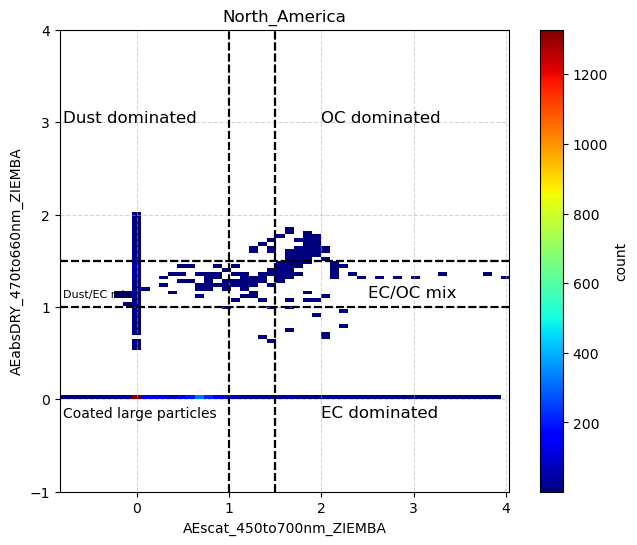

In [228]:

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC
plt.axvline(1.5, color='k', linestyle='--')    # Separating line for OC
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - OC
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC/OC  mix
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC/OC
plt.axvline(1, color='k', linestyle='--') # Separating line for dust/EC  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption dust/EC  mix
plt.axvline(1, color='k', linestyle='--') # Separating line for dust  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - Dust

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.show()


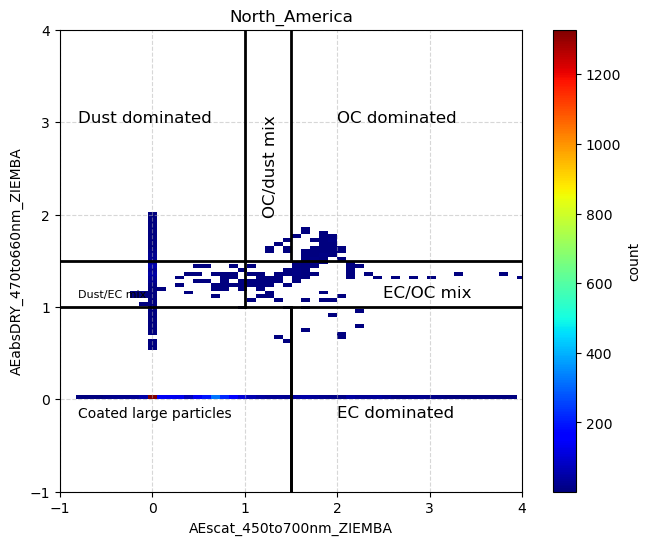

In [229]:
# Your data and histogram code...

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


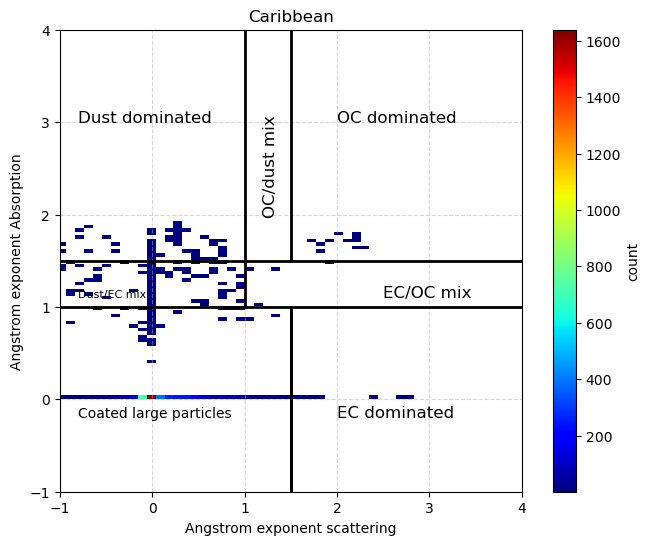

In [230]:
# Your data and histogram code...
# Your data and histogram code...

# Data
x = Caribbean_total['AEscat_450to700nm_ZIEMBA']
y = Caribbean_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('Caribbean')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


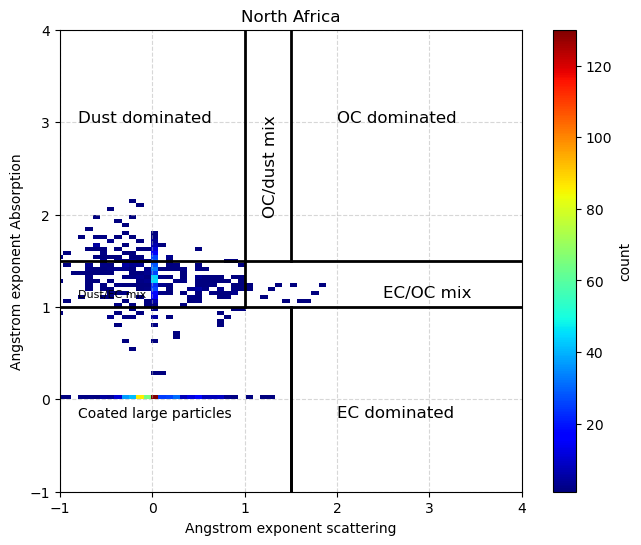

In [231]:
# Your data and histogram code...
# Your data and histogram code...

# Data
x = Africa_total['AEscat_450to700nm_ZIEMBA']
y = Africa_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('North Africa')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


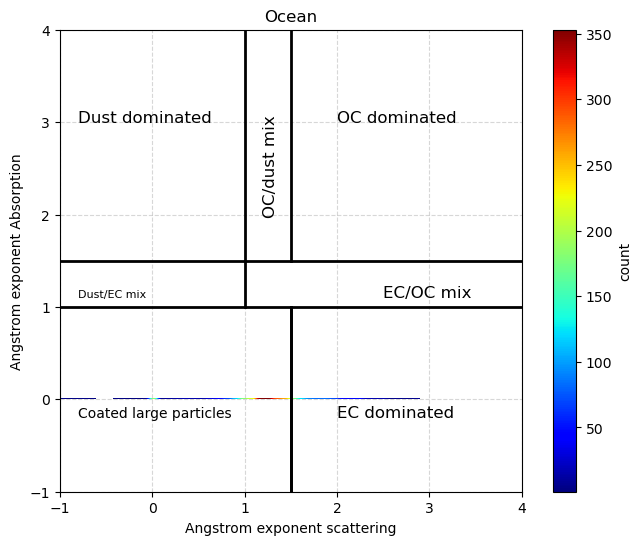

In [232]:


# Data
x = Ocean_total['AEscat_450to700nm_ZIEMBA']
y = Ocean_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('Ocean')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


In [233]:

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}


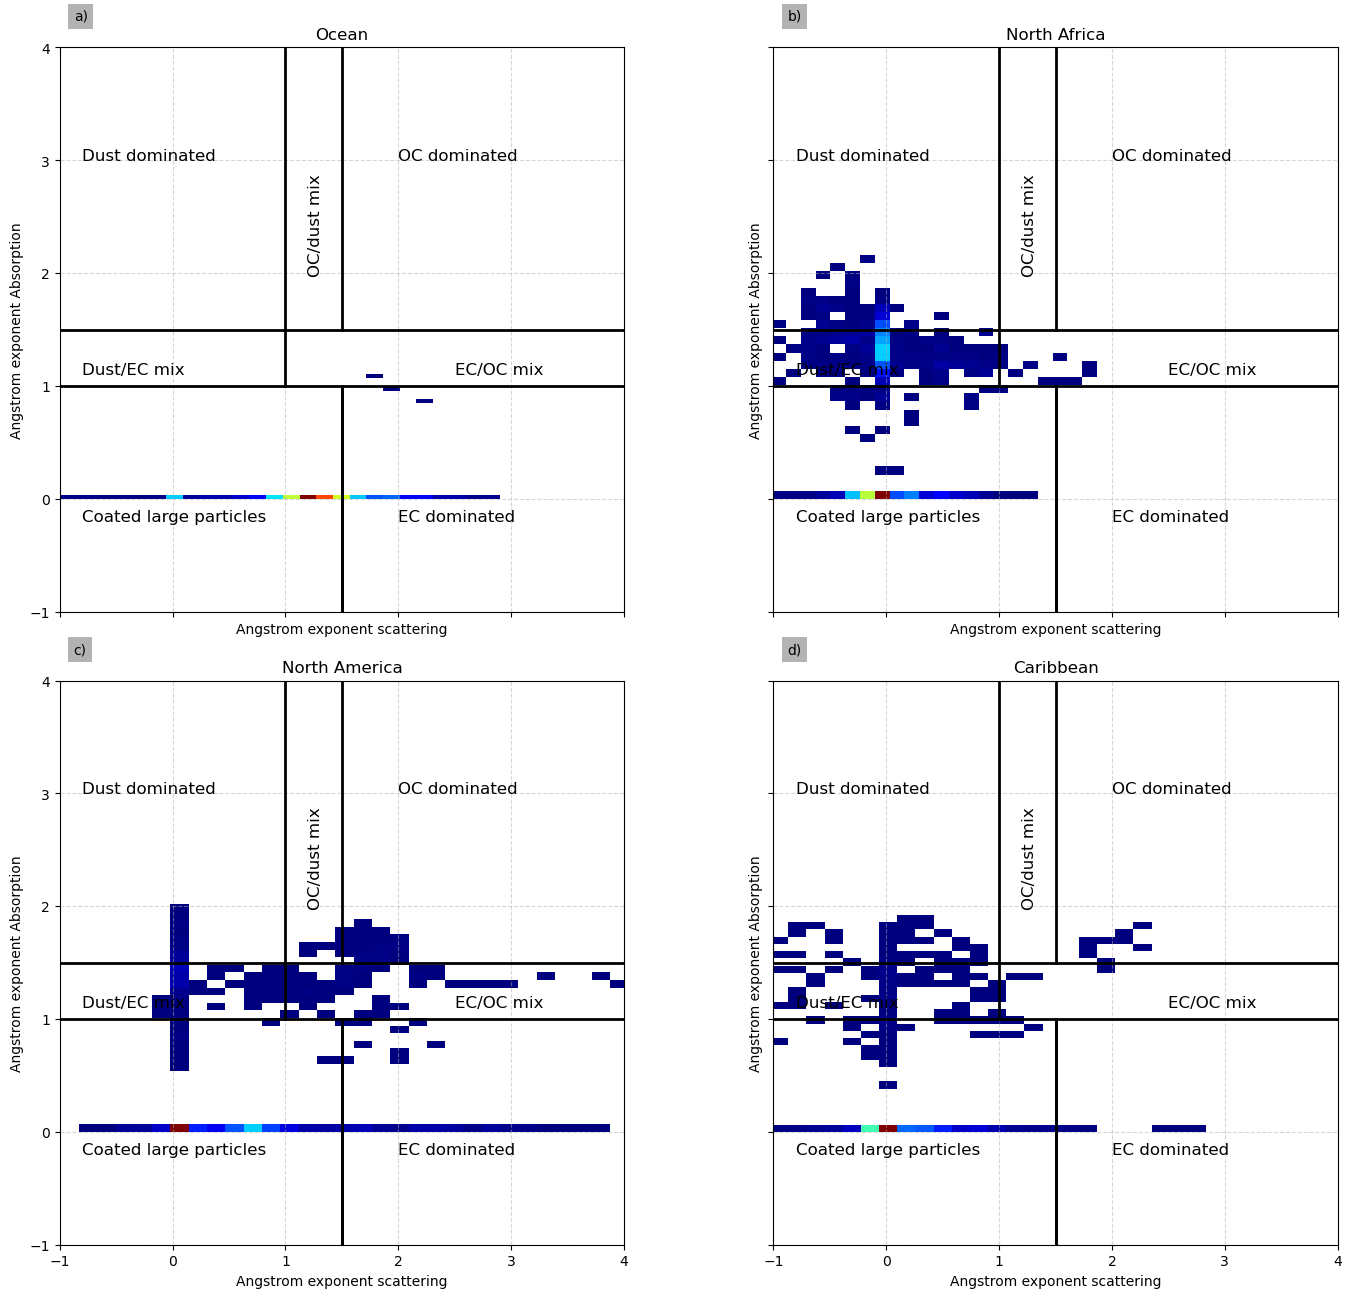

In [234]:
from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(15, 13), sharey='row', sharex='all')

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]
    # Plot the histogram inside the corresponding subplot
    ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=12, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
        ax[i, j].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')
# Set common axis limits for all subplots
for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


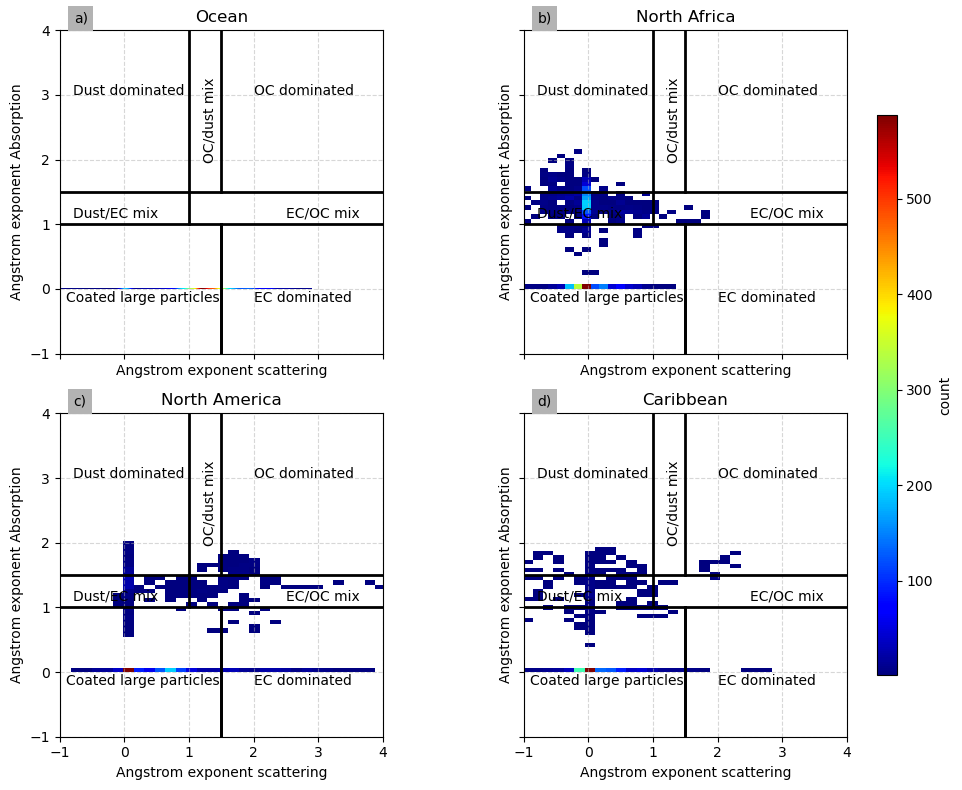

In [235]:
# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]

    # Plot the histogram inside the corresponding subplot
    im = ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )
    
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=10, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=10, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=10, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=10, color='k')
        ax[i, j].text(-0.9, -0.2, 'Coated large particles', fontsize=10, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=10, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=10, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


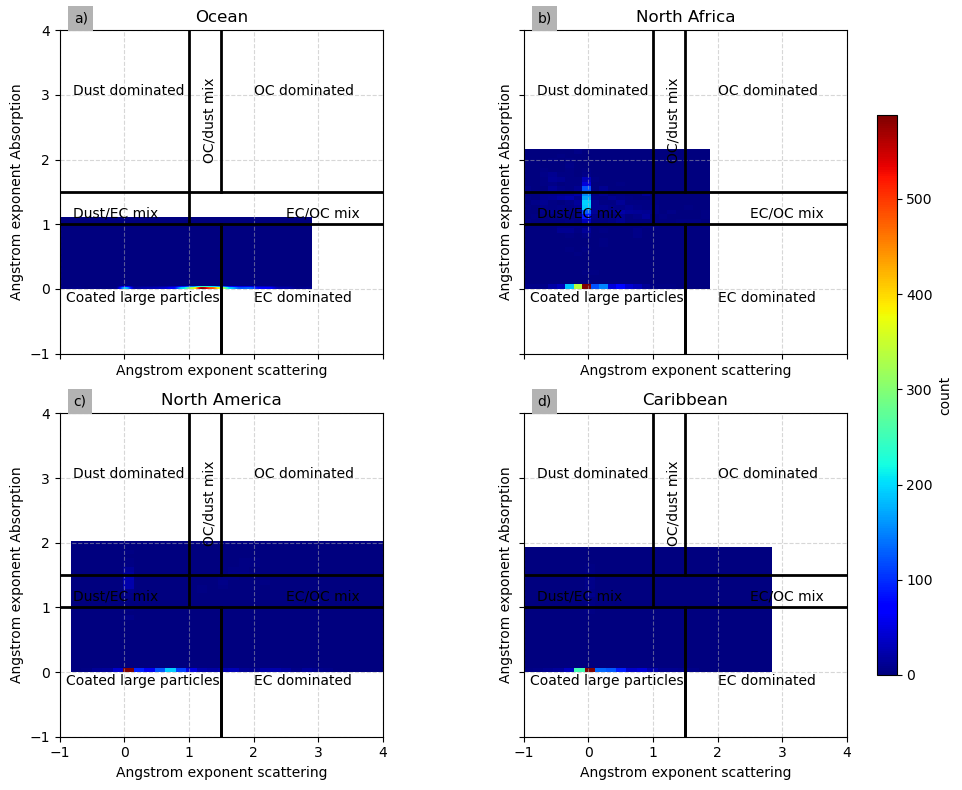

In [236]:
# Sample data (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Remove NaN values from x and y
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)

    # Plot the histogram inside the corresponding subplot
    im = ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )
    
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=10, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=10, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=10, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=10, color='k')
        ax[i, j].text(-0.9, -0.2, 'Coated large particles', fontsize=10, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=10, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=10, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


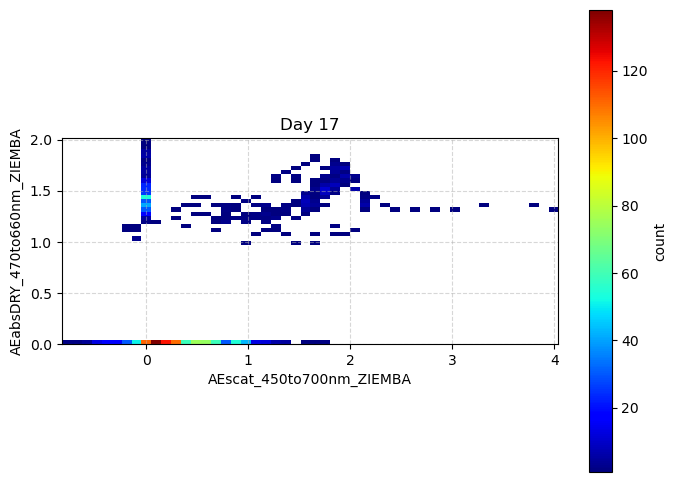

In [237]:
# Data
x = DAY17_subset['AEscat_450to700nm_ZIEMBA']
y = DAY17_subset['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Day 17')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


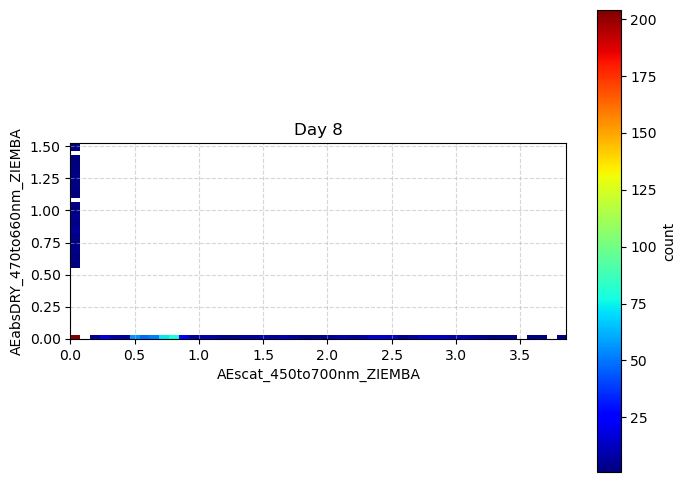

In [238]:
# Data
x = DAY8_subset['AEscat_450to700nm_ZIEMBA']
y = DAY8_subset['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Day 8')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


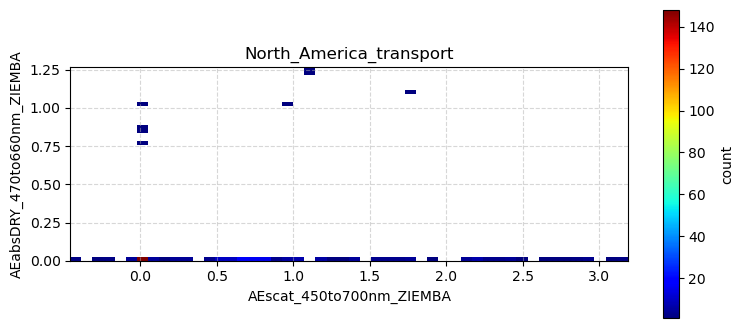

In [239]:
# Data
x = North_America_transport['AEscat_450to700nm_ZIEMBA']
y = North_America_transport['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(9, 4))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America_transport')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


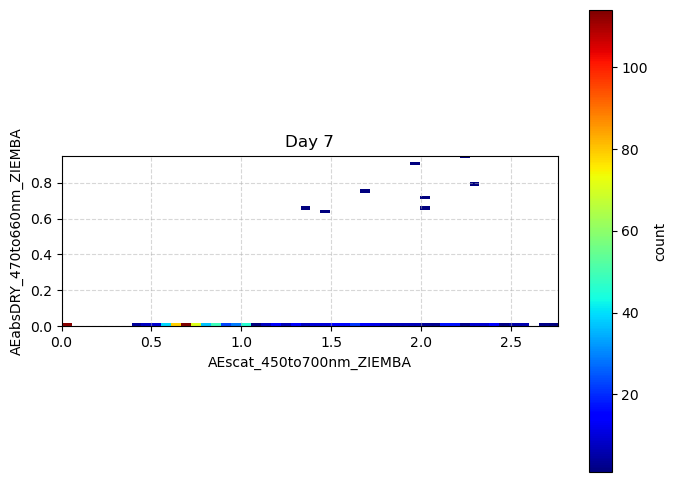

In [240]:
# Data
x = DAY7_subset['AEscat_450to700nm_ZIEMBA']
y = DAY7_subset['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Day 7')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


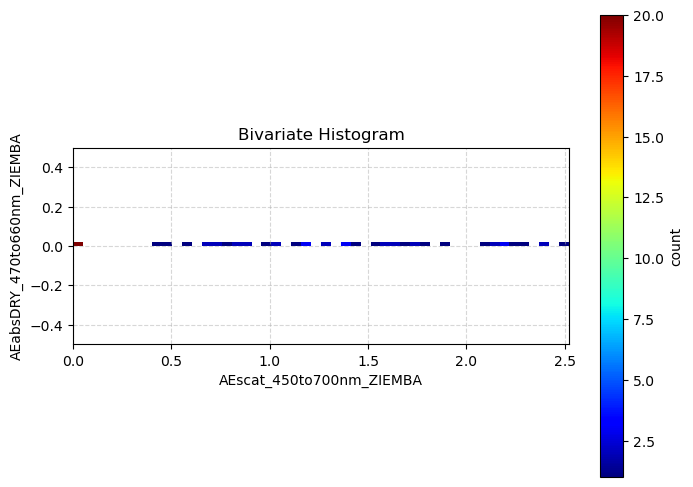

In [241]:
# Data
x = DAY7_subset_3000['AEscat_450to700nm_ZIEMBA']
y = DAY7_subset_3000['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Bivariate Histogram')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


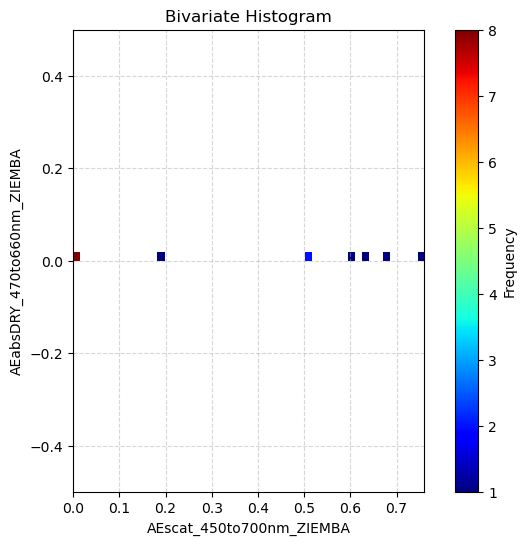

In [242]:
# Data
x = North_America_transport_plot['AEscat_450to700nm_ZIEMBA']
y = North_America_transport_plot['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='Frequency')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Bivariate Histogram')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


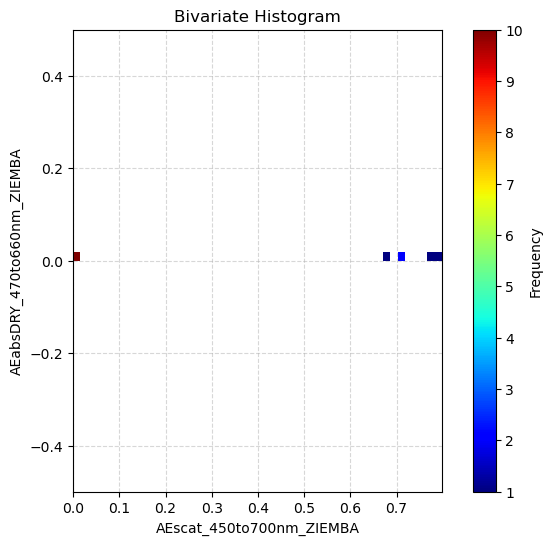

In [243]:
# Data
x = North_America_transport_plot['AEscatAMB_450to700nm_ZIEMBA']
y = North_America_transport_plot['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist==0,np.nan,hist)
# Create a figure
plt.figure(figsize=(8, 6))

# Create axes and set the background color to white
ax = plt.gca()
ax.set_facecolor('white')

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='Frequency')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('Bivariate Histogram')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
